# **POKY PCA with FDA drugs Notebook**
by **Woonghee Lee, Ph.D.** (woonghee.lee@ucdenver.edu; POKY Team, Department of Chemistry, University of Colorado Denver)

August 1, 2024


In [25]:
# @title Install requirements
!pip install -q rdkit
!pip install -q pandas
!pip install -q numpy
!pip install -q matplotlib

import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Crippen
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [22]:
# @title
FDA_SMILES = r'''CCCN(S(=O)(=O)c1ccc(cc1)C(=O)O)CCC
CCN(C(=S)SSC(=S)N(CC)CC)CC
OCC(Cn1cnc2c1c(=O)n(C)c(=O)n2C)O
C1=CC(=CC=C1[C@H]([C@@H](CO)NC(=O)C(Cl)Cl)O)[N+](=O)[O-]
CN(C(CN1c2ccccc2Sc2c1cccc2)C)C
O=C(CCC(OCC[N+](C)(C)C)=O)OCC[N+](C)(C)C
Cc1ccc(N(CC2=NCCN2)c3cc(O)ccc3)cc1
Oc1ccc(cc1)OCc1ccccc1
C1C(N(C2=C(N1)N=C(NC2=O)N)C=O)CNC3=CC=C(C=C3)C(=O)N[C@@H](CCC(=O)O)C(=O)O
CCCOc1c(N)cc(C(OCCN(CC)CC)=O)cc1
NNc1c2ccccc2cnn1
OC(CN(CCN(CC(O)=O)CC(O)=O)CC(O)=O)=O
O=C1NC(=O)N(C1)/N=C/c1ccc(o1)[N+](=O)[O-]
O=C(C1c2ccccc2Oc2c1cccc2)OCC[N+](C(C)C)(C(C)C)C
C[C@@H](N(CC1=CC=CC=C1)CCCl)COC2=CC=CC=C2
CCc1nc(N)nc(c1c1ccc(cc1)Cl)N
O=C1NC(=O)NC1(c1ccccc1)c1ccccc1
S=c1nc[nH]c2c1[nH]cn2
CN(CC1=CN=C2C(=N1)C(=NC(=N2)N)N)C3=CC=C(C=C3)C(=O)N[C@@H](CCC(=O)O)C(=O)O
C[N+]1([C@@H]2CC(C[C@H]1[C@H]3[C@@H]2O3)OC(=O)[C@H](CO)C4=CC=CC=C4)C.[Br-]
C[C@@]1([C@H]2C[C@H]3[C@@H](C(=O)C(=C([C@]3(C(=O)C2=C(C4=C1C=CC=C4O)O)O)O)C(=O)N)N(C)C)O
C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@@H]2O)CCC4=CC(=O)CC[C@]34C
CCC1(C(=O)NCNC1=O)c1ccccc1
CS(=O)(=O)OCCCCOS(=O)(=O)C
CC(CC(c1ccccc1)C2C(Oc3ccccc3C2=O)=O)=O
CN1[C@@H]2CC[C@H]1CC(C2)OC(C3=CC=CC=C3)C4=CC=CC=C4
C[n+]1cc(OC(N(C)C)=O)ccc1
C[C@]12C[C@@H]([C@H]3[C@H]([C@@H]1CC[C@@]2(C(=O)COP(=O)(O)O)O)CCC4=CC(=O)C=C[C@]34C)O
CCN(CCOC(=O)c1ccc(cc1Cl)N)CC
CC1=C(C(=O)C2=CC=CC=C2C1=O)C/C=C(\C)/CCC[C@H](C)CCC[C@H](C)CCCC(C)C
CCCC(COC(=O)N)(COC(=O)N)C
OC(C1CCCCC1)(CCN2CCCC2)c3ccccc3
COC(=O)C(c1ccccc1)C1CCCCN1
OCCN(CC)CCCC(C)Nc1c2ccc(Cl)cc2ncc1
C[C@]12CC(=O)[C@H]3[C@H]([C@@H]1CC[C@@]2(C(=O)CO)O)CCC4=CC(=O)C=C[C@]34C
C[C@]12C[C@@H]([C@H]3[C@H]([C@@H]1CC[C@@]2(C(=O)CO)O)CCC4=CC(=O)C=C[C@]34C)O
CC(=O)OCC(=O)[C@]1(CC[C@@H]2[C@@]1(C[C@@H]([C@H]3[C@H]2CCC4=CC(=O)C=C[C@]34C)O)C)O
CC[N+](Cc1ccccc1Cl)(CCNC(=O)C(=O)NCC[N+](Cc1ccccc1Cl)(CC)CC)CC.[Cl-].[Cl-]
CN1CCN(CC1)CCCN1c2ccccc2Sc2c1cc(Cl)cc2
O=C(OC1CCC[N+](C)(C)C1)C(c2ccccc2)(O)c3ccccc3
CC(C)NCC(O)c1cc(O)c(O)cc1
OCCOCCN1CCN(C(c2ccccc2)c3ccc(Cl)cc3)CC1
CNC1(C)C2CCC(C1(C)C)C2
OC([C@@H](N)Cc1cc(I)c(Oc2cc(I)c(O)cc2)c(I)c1)=O
O=C1CC[C@]2(C(=C1)CC[C@@H]1[C@]2(F)[C@@H](O)C[C@]2([C@H]1CC[C@]2(C)O)C)C
ClCCN(c1ccc(cc1)CCCC(=O)O)CCCl
OCCN1CCN(CC1)CCCN1c2ccccc2Sc2c1cc(Cl)cc2
CN(CCC(c1ccccn1)c1ccc(cc1)Br)C
CCN1C(=O)NC(C1=O)c1ccccc1
CN1C(=O)CC(C1=O)(C)c1ccccc1
COc1ccccc1OCC(COC(=O)N)O
CN(C)CCOC(c1ccccc1)c2c(C)cccc2
CCC(=O)O[C@](c1ccccc1)([C@@H](CN(C)C)C)Cc1ccccc1
OC(=O)CCC(=O)OCC(=O)[C@@]1(O)CC[C@@H]2[C@]1(C)C[C@H](O)[C@H]1[C@H]2C[C@@H](C2=CC(=O)C=C[C@]12C)C
CC(=O)OCC(=O)[C@@]1(O)CC[C@@H]2[C@]1(C)C[C@H](O)[C@H]1[C@H]2C[C@@H](C2=CC(=O)C=C[C@]12C)C
CC(=O)O[C@@H]1C[C@@H]2[C@]([C@@]1(O)C(=O)COC(=O)C)(C)C[C@@H]([C@]1([C@H]2CCC2=CC(=O)C=C[C@]12C)F)O
O=C(CC(C)(C)C)OCC(=O)[C@@]12OC(O[C@@H]1C[C@@H]1[C@]2(C)C[C@H](O)[C@]2([C@H]1CCC1=CC(=O)C=C[C@]21C)F)(C)C
OCC(=O)[C@@]12OC(O[C@@H]1C[C@@H]1[C@]2(C)C[C@H](O)[C@]2([C@H]1CCC1=CC(=O)C=C[C@]21C)F)(C)C
COCCOCCOCCOCCOCCOCCOCCOCCOCCOC(=O)c1ccc(cc1)NCCCC
CCCNC(=O)NS(=O)(=O)c1ccc(cc1)Cl
Clc1ccc2c(c1)[nH]c(=O)o2
Clc1cc(cc(c1Cl)S(=O)(=O)N)S(=O)(=O)N
Clc1cc2NC=NS(=O)(=O)c2cc1S(=O)(=O)N
ClC(C(F)(F)F)Br
OCC(=O)[C@@]1(O)[C@H](C)C[C@@H]2[C@]1(C)C[C@H](O)[C@]1([C@H]2CCC2=CC(=O)C=C[C@]12C)F
CC(N)(C)Cc1ccccc1
CN(C)CCCN1c2c(CCc3ccccc31)cccc2
OCCN1CCN(CCCN2c3c(Sc4ccc(C(F)(F)F)cc42)cccc3)CC1
Cc1onc(c1)C(=O)NNCc1ccccc1
CCCC(COC(=O)N)(COC(=O)NC(C)C)C
CCCCCCCCCC(=O)OCCN1CCN(CC1)CCCN1c2ccccc2Sc2c1cc(cc2)C(F)(F)F
CN1CCN(CC1)CCCN1c2ccccc2Sc2c1cc(cc2)C(F)(F)F
FC(c1cc2NCNS(=O)(=O)c2cc1S(=O)(=O)N)(F)F
Clc1cc2NCNS(=O)(=O)c2cc1S(=O)(=O)N
O=C1N(c2ccccc2)N(C(=O)C1CCS(=O)c1ccccc1)c1ccccc1
S=P(N1CC1)(N1CC1)N1CC1
CCN(C(C(=O)c1ccccc1)C)CC
ClCCN(P1(=O)NCCCO1)CCCl
OC(c1ccccc1)(CCN2CCCCC2)C3CC4CC3C=C4
O=C1CC[C@H]2C(=C1)CC[C@@H]1[C@@H]2CC[C@]2([C@H]1CC[C@@H]2O)C
O=C1CC[C@]2(C(=C1)[C@@H](C)C[C@@H]1[C@@H]2CC[C@]2([C@H]1CC[C@]2(O)C(=O)C)C)C
O=C1CC[C@]2(C(=C1)[C@@H](C)C[C@@H]1[C@@H]2CC[C@]2([C@H]1CC[C@]2(OC(=O)C)C(=O)C)C)C
CN=C1CN(C(c2ccccc2)=c3cc(Cl)ccc3=N1)O
CCOP(SCC[N+](C)(C)C)(OCC)=O
C[C@@H](CC1=CC=CC=C1)N(C)CC2=CC=CC=C2
CC(=O)O
CCOC(=O)C1(CCN(CC1)CCC(c1ccccc1)(c1ccccc1)C#N)c1ccccc1
ClCC1Nc2cc(Cl)c(cc2S(=O)(=O)N1C)S(=O)(=O)N
CN1CCCCC1C(=O)Nc1c(C)cccc1C
O=C1NC(c2c1cccc2)(O)c1ccc(c(c1)S(=O)(=O)N)Cl
CC1(CC)CC(=O)NC1=O
CCN(C(=O)C(c1ccccc1)CO)Cc1ccncc1
CCC#CC(C1(CC=C)C(=O)NC(=O)N(C1=O)C)C
CN([C@@H]1C(C(C(N)=O)C([C@@]2([C@H]1C[C@H]3C(C2=O)=C(O)c4c([C@H]3O)c(Cl)ccc4O)O)=O)=O)C
O=C([C@H]1CN(C)[C@H]2C(=C1)c1cccc3c1c(C2)c[nH]3)N[C@]1(C)O[C@@]2(N(C1=O)[C@@H](Cc1ccccc1)C(=O)N1[C@H]2CCC1)O
CC(=O)S[C@@H]1CC2=CC(=O)CC[C@@]2([C@@H]2[C@@H]1[C@@H]1CC[C@]3([C@]1(CC2)C)CCC(=O)O3)C
OCC(=O)[C@@]1(O)[C@H](O)C[C@@H]2[C@]1(C)C[C@H](O)[C@]1([C@H]2CCC2=CC(=O)C=C[C@]12C)F
O=C(C(c1cccnc1)(C)C)c1cccnc1
CCCCNC(=O)NS(=O)(=O)c1ccc(cc1)C
CCSc1ccc2c(c1)N(CCCN1CCN(CC1)C)c1c(S2)cccc1
CN1C(CSCC(F)(F)F)Nc2c(S1(=O)=O)cc(c(c2)Cl)S(=O)(=O)N
NNCCc1ccccc1
OCCN(c1nc(N2CCCCC2)c2c(n1)c(nc(n2)N(CCO)CCO)N1CCCCC1)CCO
O=C(OC1CC[N+](C)(C)C1)C(C2CCCC2)(O)c3ccccc3
N[C@@H]1CC1c1ccccc1
COC(=O)[C@@H]1[C@@H](OC)[C@@H](C[C@H]2[C@@H]1C[C@H]1N(C2)CCc2c1[nH]c1c2cccc1)OC(=O)c1cc(OC)c(c(c1)OC)OC
Fc1c[nH]c(=O)[nH]c1=O
O=C1NCC(O1)COc1cc(C)cc(c1)C
CSc1ccc2c(c1)N(CCC1CCCCN1C)c1c(S2)cccc1
OCC(CS)S
CC[C@H](NC(=O)[C@H]1CN(C)[C@H]2C(=C1)c1cccc3c1c(C2)cn3C)CO
CC(=O)N[C@@H](CS)C(=O)O
OCCn1c(C)ncc1[N+](=O)[O-]
Clc1ccc2c(c1)C(=NCC(=O)N2C)c1ccccc1
C1[C@@H]([C@H](O[C@H]1N2C=C(C(=O)NC2=O)I)CO)O
CN(CC[C@H](c1ccccn1)c1ccc(cc1)Br)C
O=CN1c2cc(OC)c(cc2[C@]23[C@@H]1[C@@](O)(C(=O)OC)[C@H](OC(=O)C)[C@]1([C@@H]3N(CC2)CC=C1)CC)[C@]1(C[C@@H]2CN(CCc3c1[nH]c1c3cccc1)C[C@](C2)(O)CC)C(=O)OC
OCC(=O)[C@@]12OC(O[C@@H]1C[C@@H]1[C@]2(C)C[C@H](O)[C@]2([C@H]1C[C@@H](C1=CC(=O)C=C[C@]21C)F)F)(C)C
CNCC/C=C1c2c(CCc3ccccc3\1)cccc2
C[C@@H]1[C@@H](C(=O)N[C@@H](C(=O)N2CCC[C@H]2C(=O)N(CC(=O)N([C@H](C(=O)O1)C(C)C)C)C)C(C)C)NC(=O)C3=C4C(=C(C=C3)C)OC5=C(C(=O)C(=C(C5=N4)C(=O)N[C@H]6[C@H](OC(=O)[C@@H](N(C(=O)CN(C(=O)[C@@H]7CCCN7C(=O)[C@H](NC6=O)C(C)C)C)C)C(C)C)C)N)C
CCn1cc(C(=O)O)c(=O)c2c1nc(C)cc2
CNCCCN1c2ccccc2CCc2c1cccc2
COc1c2oc(=O)ccc2cc2c1occ2
Nc1nc(N)c2c(n1)nc(c(n2)c1ccccc1)N
NCCCCCC(=O)O
ClCCN(CCCl)c1ccc(C[C@H](N)C(O)=O)cc1
C[C@]1(O)[C@H]2[C@H](O)[C@H]3[C@H](N(C)C)C(C(C(N)=O)=C(O)[C@@]3(O)C(C2=C(O)C4=C1C=CC=C4O)=O)=O
O=C1OC[C@]2([C@H](C1)CC[C@@H]1[C@@H]2CC[C@]2([C@H]1CC[C@]2(C)O)C)C
CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@@H]2O[C@@H](C)[C@@H]([C@](C2)(C)OC)O)[C@H](C)[C@@H](O[C@@H]2O[C@H](C)C[C@@H]([C@H]2O)N(C)C)[C@](C[C@H](C(=O)[C@@H]([C@H]([C@]1(C)O)O)C)C)(C)O
CCc1nccc(c1)C(=S)N
CCN1CC(C(C1=O)(c1ccccc1)c1ccccc1)CCN1CCOCC1
CN(CCC=C1c2ccccc2CCc2c1cccc2)C
COc1ccc2c(c1)c(CC(=O)O)c(n2C(=O)c1ccc(cc1)Cl)C
OCC(CO)(CO)N
CCCNC(C(=O)Nc1ccccc1C)C
O=C1Nc2ccc(cc2C(=NC1O)c1ccccc1)Cl
COc1cc2N(C)[C@@H]3[C@@]4(c2cc1[C@]1(C[C@@H]2CN(CCc5c1[nH]c1c5cccc1)C[C@](C2)(O)CC)C(=O)OC)CCN1[C@H]4[C@@]([C@H]([C@]3(O)C(=O)OC)OC(=O)C)(CC)C=CC1
O=c1ncnc2c1c[nH][nH]2
O=C(NS(=O)(=O)c1ccc(cc1)C)NN1CCCCCC1
Nc1nc(=S)c2c([nH]1)nc[nH]2
OC(=O)c1cc(c(cc1NCc1ccco1)Cl)S(=O)(=O)N
CCN(CCOc1ccc(cc1)/C(=C(/c1ccccc1)\Cl)/c1ccccc1)CC
Fc1ccc(C(CCCN2CCC(O)(c3ccc(Cl)cc3)CC2)=O)cc1
OC(=O)c1ccccc1Nc1cccc(c1C)C
CCC(=C)C(=O)c1ccc(c(c1Cl)Cl)OCC(=O)O
CCCCCCCCCC(=O)OC1(CCN(CC1)CCCC(=O)c1ccc(cc1)F)c1ccc(cc1)Cl
CN1CCN(CC1)CC/C=C\1/c2ccccc2Sc2c1cc(cc2)S(=O)(=O)N(C)C
CNCCCC1c2ccccc2C=Cc2c1cccc2
NC(=O)NO
CCN(CC)CCOc1ccc(/C(c2ccccc2)=C(Cl)/c3ccccc3)cc1
OC(CNC(C)C)COc1c2ccccc2ccc1
CC[C@@H](CO)NCCN[C@@H](CC)CO
C/C(C)=C\CN1CC[C@]2(C)[C@@H](C)[C@H]1Cc3ccc(O)cc32
CN(C)[C@@H]1C(/C(C([C@]2(O)[C@H]1[C@H]([C@@H]3[C@H](c4c(C(O)=C3C2=O)c(O)ccc4)C)O)=O)=C(N)/O)=O
OCC(=O)[C@@]1(O)[C@@H](C)C[C@@H]2[C@]1(C)C[C@H](O)[C@]1([C@H]2CCC2=CC(=O)C=C[C@]12C)F
NC12CC3CC(CC(C3)C2)C1
NC(=O)N1c2ccccc2C=Cc2c1cccc2
Cn1cnc(c1Sc1ncnc2c1[nH]cn2)[N+](=O)[O-]
OC([C@@H]1N2C([C@@H](NC(c3c(c4c(Cl)cccc4Cl)noc3C)=O)[C@H]2SC1(C)C)=O)=O
O[C@@H]1CO[C@H]2[C@@H]1OC[C@@H]2O
C#C[C@]1(O)CC[C@@H]2[C@]1(CC)CC[C@H]1[C@H]2CCC2=CC(=O)CC[C@H]12
CNNCc1ccc(C(NC(C)C)=O)cc1
NCc1ccc(S(=O)(N)=O)cc1
CN(CC/C=C\1/c2ccccc2OCc2c1cccc2)C
OC[C@H]1O[C@H]([C@H]([C@@H]1O)O)n1ccc(nc1=O)N
O=C1C=C[C@]2(C(=C1)CC[C@@H]1[C@@H]2CC[C@]2([C@H]1CCC(=O)O2)C)C
O=C1CC[C@]2(C(=C1)[C@@H](C)C[C@@H]1[C@@H]2[C@@H](O)C[C@]2([C@H]1CC[C@@H]2C(=O)C)C)C
OC[C@H]1OC(O[C@@H]2[C@H]([C@@H](C[C@H](N)C2O[C@H]3O[C@@H]([C@@H](O)[C@H](O)[C@H]3N)CO)N)O)[C@H](O)[C@@H]1O[C@H]4O[C@H]([C@@H](O)[C@H](O)[C@H]4N)CN
O=C(OCCN1CCCCC1)c(cccc23)c2oc(c4ccccc4)c(C)c3=O
Fc1ccc(cc1)C(=O)CCCN1CCC(=CC1)n1c(=O)[nH]c2c1cccc2
CNC1(c2c(Cl)cccc2)CCCCC1=O
ClC(C(c1ccccc1Cl)c1ccc(cc1)Cl)Cl
CN1CCCCC1CCN1c2ccccc2Sc2c1cc(cc2)S(=O)C
N[C@H](C(S)(C)C)C(=O)O
OC[C@H]1O[C@H](C[C@@H]1O)n1cc(F)c(=O)[nH]c1=O
C/C(=C\C=C\C(=C\C(=O)O)\C)/C=C/C1=C(C)CCCC1(C)C
NC(=O)c1cnccn1
Nc1c(F)cnc(=O)[nH]1
CN([C@@H]1C(=C(C(=O)N)C(=O)[C@@]2([C@H]1C[C@@H]1Cc3c(C(=O)C1=C2O)c(O)ccc3N(C)C)O)O)C
C=CCN1CC[C@]23[C@]4(O)[C@H]1Cc5ccc(O)c(O[C@H]3C(CC4)=O)c52
O=C1CC[C@]2(C(=C1)C(=C[C@@H]1[C@@H]2CC[C@]2([C@H]1CC[C@]2(OC(=O)C)C(=O)C)C)C)C
CN[C@H]1[C@H](O)[C@H]2O[C@@H]3O[C@H](C)CC(=O)[C@@]3(O[C@@H]2[C@H]([C@H]1O)NC)O
CC(=O)OCC(=O)[C@@]12OC(O[C@@H]1C[C@@H]1[C@]2(C)C[C@H](O)[C@]2([C@H]1C[C@@H](C1=CC(=O)C=C[C@]21C)F)F)(C)C
OCCc1c(C)n(Cc2c(N)nc(C)nc2)cs1
NC(OCC[N+](C)(C)C)=O
OCc1c(CO)cnc(c1O)C
CCCCN1CCCCC1C(Nc2c(C)cccc2C)=O
FC(OC(C(Cl)F)(F)F)F
O=C(N[C@@H]1C(N2[C@@H]1SC(C)(C)[C@@H]2C(O)=O)=O)C(c3ccccc3)C(Oc4cc(CCC5)c5cc4)=O
OCC(=O)[C@@]12OC(O[C@@H]1C[C@@H]1C2(C)CC(O)[C@H]2C1CCC1=CC(=O)C=CC21C)(C)C
Nc1ccc(S(=O)(Nc2ncccn2)=O)cc1
Nc1ccc(cc1)S(=O)(=O)Nc1noc(c1)C
Clc1ccc2c(c1)S(=O)(=O)N=C(N2)C
CC1Nc2cc(Cl)c(cc2C(=O)N1c1ccccc1C)S(=O)(=O)N
CCCC(C1(CC)C(=O)NC(=O)NC1=O)C
OC(CNC(C)C)c1cc(O)cc(O)c1
C#C[C@]1(O)CC[C@@H]2[C@]1(C)CC[C@H]1[C@H]2CCc2c1ccc(c2)O
C#C[C@]1(O)CC[C@@H]2[C@]1(C)CC[C@H]1[C@H]2CCC2=CC(=O)CC[C@H]12
C#C[C@@]1(CC[C@@H]2[C@]1(C)CC[C@H]1[C@H]2CCC2=CC(=O)CC[C@H]12)OC(=O)C
O=C1CN(/N=C/c2oc(c3ccc([N+]([O-])=O)cc3)cc2)C(N1)=O
NCCc1ccc(c(c1)O)O
OC(c1cc(O)cc(c1)O)CNC(C)(C)C
CC(Cc1ccc(cc1)C(C(=O)O)C)C
Clc1ccc(c(c1)Cl)COC(c1ccc(cc1Cl)Cl)Cn1cncc1
CC(Cc1ccc(cc1)C(C(=O)[O-])C)C.[NH3+]CCCC[C@@H](C(=O)O)N
CC[C@@H]1C(=O)OC[C@@H]1Cc1cncn1C
O=C(N[C@@H]1C(N2[C@@H]1SCC(C)=C2C(O)=O)=O)[C@H](N)C3=CCC=CC3
O=C([C@@H](c1ccc(cc1)O)N)N[C@@H]1C(=O)N2[C@@H]1SC([C@@H]2C(=O)O)(C)C
OCC(=O)[C@@]1(O)C[C@H](O[C@H]2C[C@H](N)[C@@H]([C@@H](O2)C)O)c2c(C1)c(O)c1c(c2O)C(=O)c2c(C1=O)cccc2OC
O=C1CN=C(c2c(N1)ccc(c2)[N+](=O)[O-])c1ccccc1Cl
Clc1ccccc1C(n1cncc1)(c1ccccc1)c1ccccc1
CN(N/N=C\1/N=CN=C1C(=O)N)C
CCN(CC)CC#CCOC(C(C1CCCCC1)(O)c2ccccc2)=O
CCCCCC(=O)O[C@@]1(CC[C@@H]2[C@]1(C)CC[C@H]1[C@H]2CCC2=CC(=O)CC[C@]12C)C(=O)C
NC[C@H]1O[C@H](O[C@@H]2[C@@H](N)C[C@H]([C@@H]([C@H]2O)O[C@H]2O[C@H](CO)[C@H]([C@@H]([C@H]2O)N)O)N)[C@@H](C[C@@H]1O)N
O=C1OCC(=C1)[C@H]1CC[C@]2([C@]1(C)[C@H](O)C[C@H]1[C@H]2CC[C@H]2[C@]1(C)CC[C@@H](C2)O[C@H]1C[C@H](O)[C@@H]([C@H](O1)C)O[C@H]1C[C@H](O)[C@@H]([C@H](O1)C)O[C@H]1C[C@H](O)[C@@H]([C@H](O1)C)O)O
CN(C(C(C1=CC=CC=C1)(C2=CC=CC=C2)CCN3CCC(C4=CC=C(Cl)C=C4)(O)CC3)=O)C
O=C(O)CN(CC(O)=O)CCN(CC(O)=O)CCN(CC(O)=O)CC(O)=O
O=C(C=C1OC2=C3C=CC(O)=C2)C=CC1=C3C4=CC=CC=C4C(O)=O
CC1=CC=C(C(C2=CC=C(CC(O)=O)N2C)=O)C=C1
ClC(C=C1)=CC=C1N/C(N)=N/C(N)=NCCCCCCN=C(N)/N=C(N)/NC2=CC=C(Cl)C=C2
ClCCN(N=O)C(=O)NC1CCCCC1
CN1C2=C(NC=N2)C(=O)N(C)C1=O
C[C@@H](C1=CC2=C(C=C1)C=C(C=C2)OC)C(=O)O
N1C2=CC=CC=C2N=C1C1=CSC=N1
C1=NC(=C2C(=N1)N(C=N2)[C@H]3[C@H]([C@@H]([C@H](O3)CO)O)O)N
ClC1=CC(Cl)=C(O)C2=C1C=CC=N2
C[C@H](C(O)=O)C1=CC2=C(C=C(OC)C=C2)C=C1
C[C@]12CC[C@H]3[C@@H](CCC4=CC5=C(C=NO5)C[C@]34C)[C@@H]1CC[C@@]2(O)C#C
CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3CC[C@]12C
OC[C@H]1O[C@](O)(CO)[C@@H](O)[C@@H]1O[C@@H]1O[C@H](CO)[C@H](O)[C@H](O)[C@H]1O
CN(CC/C=C1C2=CC=CC=C2C=CC3=CC=CC=C3\1)C
CN/C(NCCSCC1=CC=C(O1)CN(C)C)=C\[N+]([O-])=O
ClCCNC(N(N=O)CCCl)=O
CN=C(NCCSCc1nc[nH]c1C)NC#N
CC(O)(P(O)(O)=O)P(O)(O)=O
CC\C(=C(/C1=CC=CC=C1)C1=CC=C(OCCN(C)C)C=C1)C1=CC=CC=C1
CC(C)N(CCC(C(N)=O)(C1=CC=CC=C1)C1=CC=CC=N1)C(C)C
NCC(CC(O)=O)C1=CC=C(Cl)C=C1
OC1N=C(C2=CC=CC=C2Cl)C2=CC(Cl)=CC=C2NC1=O
CCOC1=CC=CC=C1OCCN[C@H](C)CC1=CC=C(OC)C(=C1)S(N)(=O)=O
CN1CCC[C@@H]1CCO[C@](c2ccc(Cl)cc2)(C)c3ccccc3
C[C@@H]1CC2C3CCC4=CC(=O)C=CC4(C)[C@@]3(F)C(O)CC2(C)C1C(=O)CO
C[C@@H]1CC2C3C[C@H](F)C4=CC(=O)C=CC4(C)[C@@]3(Cl)C(O)CC2(C)C1C(=O)COC(=O)C(C)(C)C
C[C@]12CC[C@H]3[C@H]([C@@H]1CCC2=O)CCC4=CC(OS(O)(=O)=O)=CC=C34
C[C@H]1C[C@H]2[C@@H]3C[C@H](F)C4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@]2(C)[C@@]1(O)C(=O)CO
C[C@H]1C[C@H]2[C@@H]3C[C@H](F)C4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@]2(C)[C@@]1(OC(C)=O)C(=O)COC(C)=O
OC(C1(C2=CC=CC=C2)CCN(CC1)CCC(C3=CC=CC=C3)(C4=CC=CC=C4)C#N)=O
CCCC(CCC)C(O)=O
CS(C)=O
C1C[C@H](N(C1)C(=O)[C@@H]2CSSCCC(=O)N[C@H](C(=O)N[C@H](C(=O)N[C@H](C(=O)N[C@H](C(=O)N2)CC(=O)N)CCC(=O)N)CC3=CC=CC=C3)CC4=CC=C(C=C4)O)C(=O)N[C@H](CCCN=C(N)N)C(=O)NCC(=O)N
CC(CCC1=CC=C(O)C=C1)NCCC1=CC=C(O)C(O)=C1
CC1=C(CC(O)=O)C2=CC(F)=CC=C2\C1=C/C1=CC=C(C=C1)S(C)=O
COCCC1=CC=C(OCC(O)CNC(C)C)C=C1
CC(C)(NC[C@@H](COC1=NSN=C1N2CCOCC2)O)C
CO[C@@]1([C@H]2SCC(COC(N)=O)=C(C(O)=O)N2C1=O)NC(CC3=CC=CS3)=O
CC1=C(N2[C@H](SC1)[C@H](NC(=O)[C@H](N)c3ccc(O)cc3)C2=O)C(O)=O
Oc1ccc2C[C@H]3N(CC[C@@]4(CCCC[C@@]34O)c2c1)CC5CCC5
BrC1=C2C3=C(N1)C=CC=C3C4=C[C@@H](C(N[C@]5(C(C)C)O[C@@](O)([C@H](CCC6)N6C([C@@H]7CC(C)C)=O)N7C5=O)=O)CN(C)[C@]4([H])C2
C[C@H](CCCC(C)(C)O)[C@H]1CC[C@H]2\C(CCC[C@]12C)=C\C=C1\C[C@@H](O)C[C@H](O)C1=C
CCN(CCNC(C1=CC(Cl)=C(C=C1OC)N)=O)CC
NC1=CC(=NC(=N)N1O)N1CCCCC1
CNCCCC12CCC(C3=CC=CC=C23)C4=CC=CC=C14
CC(CN(C)C)CN1C2=CC=CC=C2CCC2=CC=CC=C12
FC(F)OC(Cl)C(F)(F)F
C[C@](CC1=CC=C(C=C1)O)(C(O)=O)N
CC(C)(C)NCC(O)COC1=CC=CC2=C1C[C@H](O)[C@H](O)C2
N[C@@H](C(=O)N[C@H]1[C@H]2SCC(Cl)=C(N2C1=O)C(O)=O)C1=CC=CC=C1
CCCCC[C@](O)(/C=C\C1[C@H](C[C@H]([C@H]1C/C=C/CCCC(O)=O)O)O)C
CN1[C@H]2CC(OC([C@@H](C3=CC=CC=C3)CO)=O)C[C@H]1[C@@H]4O[C@H]24
CC(=O)OCC(=O)[C@@]12OC3(CCCC3)O[C@@H]1C[C@H]1C3CCC4=CC(=O)C=CC4(C)[C@@]3(F)[C@@H](O)CC21C
OC(C=C1)=C(O2)C3=C1C[C@@H]4[C@]5(O)CC[C@H](O)[C@H]2[C@@]53CCN4CC6CCC6
COC1=CC=CC2=C1C(C3=C(C4=C(C(O)=C3C2=O)C[C@](C[C@@H]4O[C@H]5C[C@@H]([C@@H]([C@@H](O5)C)O)N)(C(C)=O)O)O)=O
COC1=CC=CC2=C1C(=O)C1=C(O)C3=C(C[C@](O)(C[C@@H]3O[C@H]3C[C@H](N)[C@H](O)[C@H](C)O3)C(C)=O)C(O)=C1C2=O
CC1(C)O[C@@H]2C[C@H]3[C@@H]4CCC5=CC(=O)CC[C@]5(C)[C@@]4(F)[C@@H](O)C[C@]3(C)[C@@]2(O1)C(=O)CCl
ClC1=CC=C2OC3=CC=CC=C3N=C(N3CCNCC3)C2=C1
COC1=CC(CC2=CN=C(N)N=C2N)=CC(OC)=C1OC
COC1=CC(CC2=CN=C(N=C2N)N)=CC(OC)=C1OC
C1[C@@H]([C@H](O[C@H]1N2C=C(C(=O)NC2=O)C(F)(F)F)CO)O
CCC1(C2=CC=C(N)C=C2)CCC(NC1=O)=O
CC(C)(C(OC1=C(OC(C(C)(C)C)=O)C=C(C(O)CNC)C=C1)=O)C
O=C(N1C=CC=CC1=N2)N2CCCN3CCN(C4=CC(Cl)=CC=C4)CC3
N/C(N)=N\C(C1=NC(Cl)=C(N=C1N)N)=O
CCN(C1=CC=C(C(C2=CC(S(O)(=O)=O)=CC=C2S(O)(=O)=O)C3=CC=C(N(CC)CC)C=C3)C=C1)CC
Cc1nnc2CN=C(c3ccccc3)c4cc(Cl)ccc4n12
CC1=CC=C(C)C(OCCCC(C)(C)C(O)=O)=C1
COC(=O)C1=C(C)NC(C)=C(C1C1=CC=CC=C1[N+]([O-])=O)C(=O)OC
COC1=NC=NC(NS(=O)(=O)C2=CC=C(N)C=C2)=C1OC
CC(C(C#N)(C1=CC(OC)=C(OC)C=C1)CCCN(CCC2=CC(OC)=C(OC)C=C2)C)C
CC(C)(C)NCC(O)C1=CC=C(O)C(CO)=C1
CC(C)NCC(O)COC1=CC=C(CC(N)=O)C=C1
CN1C2=CC=C(Cl)C=C2C(=NC(O)C1=O)C1=CC=CC=C1
CN(CC[C@H](C1=CC=CC=N1)C2=CC=C(C=C2)Cl)C
CO/N=C(c1nc(N)sc1)\C(N[C@H]2[C@H]3SCC(COC(C)=O)=C(C(O)=O)N3C2=O)=O
C[C@H](CS)C(=O)N1CCC[C@H]1C(O)=O
CC(=O)N1CCN(CC1)C1=CC=C(OC[C@@H]2CO[C@](CN3C=CN=C3)(O2)C2=CC=C(Cl)C=C2Cl)C=C1
CCN1CCN(C(C1=O)=O)C(N[C@H](C2=CC=CC=C2)C(N[C@@H]3[C@@H]4SC(C)([C@@H](C(O)=O)N4C3=O)C)=O)=O
CCCCC[C@H](O)/C=C/[C@H]1[C@H](O)CC(=O)[C@@H]1CCCCCCC(O)=O
CO[C@]12[C@H]3N[C@H]3CN1C1=C([C@H]2COC(N)=O)C(=O)C(N)=C(C)C1=O
C[C@]12CC[C@H]3[C@@H](CCC4=CC(OC(=O)N(CCCl)CCCl)=CC=C34)[C@@H]1CC[C@@H]2O
COC12CC[C@]3([C@H]4CC5=CC=C(C6=C5[C@]3([C@H]2O6)CCN4CC7CC7)O)C[C@@H]1[C@](O)(C(C)(C)C)C
CCC(=O)OCC(=O)[C@@]1(OC(=O)CC)[C@@H](C)C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(Cl)[C@@H](O)C[C@]12C
[H][C@@]1(O[C@@H]([C@H]([C@@H]([C@H]1OS(=O)(O[Al](O)O)=O)OS(=O)(O[Al](O)O)=O)OS(=O)(O[Al](O)O)=O)COS(=O)(O[Al](O)O)=O)O[C@@]2(O[C@@H]([C@H]([C@@H]2OS(=O)(O[Al](O)O)=O)OS(=O)(O[Al](O)O)=O)COS(=O)(O[Al](O)O)=O)COS(=O)(O[Al](O)O)=O
NCC[C@@H](C(N[C@@H]1C[C@@H]([C@H]([C@@H]([C@H]1O[C@H]2O[C@@H]([C@H]([C@@H]([C@H]2O)N)O)CO)O)O[C@H]3O[C@@H]([C@H]([C@@H]([C@H]3O)O)O)CN)N)=O)O
OC(COC1=CC=CC2=C1C(C=C(C(O)=O)O2)=O)COC3=CC=CC4=C3C(C=C(C(O)=O)O4)=O
CC1=CC(=O)N(O)C(=C1)C2CCCCC2
C\C(\C=C\C1=C(C)CCCC1(C)C)=C/C=C/C(/C)=C\C(O)=O
CC1=NN=C2CN=C(C3=CC=CC=C3Cl)C3=CC(Cl)=CC=C3N12
CCOC(=O)C1=CN=CN1[C@H](C)C2=CC=CC=C2
CN1\C(=C(\O)NC2=CC=CC=N2)C(=O)C2=CC=CC=C2S1(=O)=O
OC(=O)C1=CC(=CC=C1O)C1=CC=C(F)C=C1F
CC(C)NCC(O)COC1=C2C=CNC2=CC=C1
ClC1=CC=C(COC(CN2C=CN=C2)C2=CC=C(Cl)C=C2Cl)C=C1
OC(C1CCN2C1=CC=C2C(C3=CC=CC=C3)=O)=O
O=C(C1CCCCC1)N1CC2N(CCC3=CC=CC=C23)C(=O)C1
COC1=CC=C([C@@H]2SC3=CC=CC=C3N(C([C@@H]2OC(C)=O)=O)CCN(C)C)C=C1
COC1=CC=C2C[C@H]3[C@H]4CCCC[C@@]4(CCN3C)C2=C1
COC1=CC=C2C[C@@H]3[C@@H]4CCC(=O)[C@@H]5OC1=C2[C@]45CCN3C
CN(N=O)C(=O)N[C@H]1[C@@H](O)O[C@H](CO)[C@@H](O)[C@@H]1O
[H][C@@]12C[C@@H](C)[C@](OC(=O)CC)(C(=O)COC(=O)CC)[C@@]1(C)C[C@H](O)[C@@]1([H])[C@@]2([H])[C@H](Cl)CC2=CC(=O)C=C[C@]12C
CCCCNc1cc(cc(c1Oc2ccccc2)[S](N)(=O)=O)C(O)=O
CCCC(C(O)=O)CCC
CC(=O)NO
CC[C@H]1C(=O)N(CC(=O)N([C@H](C(=O)N[C@H](C(=O)N([C@H](C(=O)N[C@H](C(=O)N[C@@H](C(=O)N([C@H](C(=O)N([C@H](C(=O)N([C@H](C(=O)N([C@H](C(=O)N1)[C@@H]([C@H](C)C/C=C/C)O)C)C(C)C)C)CC(C)C)C)CC(C)C)C)C)C)CC(C)C)C)C(C)C)CC(C)C)C)C
CC1CC2=CC=CC=C2N1NC(=O)C1=CC=C(Cl)C(=C1)S(N)(=O)=O
ClC1=C(COC(CN2C=CN=C2)C2=CC=C(Cl)C=C2Cl)C=CS1
CO/N=C(C1=CSC(N)=N1)\C(N[C@H]2[C@H]3SCC=C(C(O)=O)N3C2=O)=O
CO\N=C(C(=O)N[C@H]1[C@H]2SCC(=C(N2C1=O)C(O)=O)COC(N)=O)/c3occc3
CO\N=C(/C(=O)N[C@H]1[C@H]2SCC(COC(N)=O)=C(N2C1=O)C(=O)OC(C)OC(C)=O)C1=CC=CO1
COC1=CC(=CC(OC)=C1O)[C@H]1[C@@H]2[C@H](COC2=O)[C@H](O[C@@H]2O[C@@H]3CO[C@@H](C)O[C@H]3[C@H](O)[C@H]2O)C2=CC3=C(OCO3)C=C12
CC1=CN=C(C=N1)C(=O)NCCC1=CC=C(C=C1)S(=O)(=O)NC(=O)NC1CCCCC1
CCC(=O)N(C1=CC=CC=C1)C1(COC)CCN(CCC2=CC=CS2)CC1
CN1C=NC2=C1C(=O)N(CCCCC(C)=O)C(=O)N2C
COC1=CC=C(Cl)C=C1C(=O)NCCC1=CC=C(C=C1)S(=O)(=O)NC(=O)NC1CCCCC1
FC1=CC=C(C=C1)C(CCCN1CCC(CC1)N1C(=O)NC2=CC=CC=C12)C1=CC=C(F)C=C1
NC(C1=CC=C(C=C1)OCCCCCOC2=CC=C(C(N)=N)C=C2)=N
CCCC(NC1=CC=C(C(C(C)=O)=C1)OCC(CNC(C)C)O)=O
CC(NCC(C1=CC=C(C(C(N)=O)=C1)O)O)CCC2=CC=CC=C2
CN1CCC[C@H]1C1=CC=CN=C1
CO/N=C(C1=CSC(N)=N1)\C(N[C@H]2[C@H]3SCC(CSC4=NC(C(NN4C)=O)=O)=C(C(O)=O)N3C2=O)=O
CN1CC[C@@]23[C@H]4OC5=C(C=CC(C[C@@H]1[C@@H]3CCC4=O)=C25)O
OC1=CC=C(C[C@H]2N(CC[C@@]34[C@]2(CC5)O)CC6CC6)C4=C1O[C@@H]3C5=O
CN1CC[C@@]23[C@H]4OC5=C(C=CC(C[C@@H]1[C@@H]3C=C[C@@H]4O)=C25)O
CCCCc(o1)c(C(c2cc(I)c(OCCN(CC)CC)c(I)c2)=O)c3c1cccc3
C[N+](C)(C)C[C@@H](CC(=O)[O-])O
FC1=CC=CC=C1C1=NCC(=S)N(CC(F)(F)F)C2=CC=C(Cl)C=C12
CC(C(C1=CC=CC(Cl)=C1)=O)NC(C)(C)C
Clc1ccc(CCC(Cn2ccnc2)Sc3c(Cl)cccc3Cl)cc1
CC(N)COC1=C(C)C=CC=C1C
CC(C)NCC(O)COC1=CC=C(CCOCC2CC2)C=C1
FC(F)(F)COC1=CC=C(OCC(F)(F)F)C(=C1)C(=O)NCC1CCCCN1
CC(C)(NC[C@@H](COC1=CC=CC2=C1CCCC2=O)O)C
CO[C@@]1([C@H]2SCC(CSC3=NN=NN3C)=C(C(O)=O)N2C1=O)NC(C4S/C(S4)=C(C(O)=O)\C(N)=O)=O
CC(O/N=C(c1nc(N)sc1)/C(N[C@H]2[C@H]3SCC(C[n+]4ccccc4)=C(C(O)=O)N3C2=O)=O)(C(O)=O)C
CC1CC2C3CCC4=CC(=O)C=CC4(C)[C@@]3(F)C(O)CC2(C)[C@@]1(O)C(=O)CCl
CCCCCC1=CC(O)=C2[C@@H]3C=C(C)CC[C@H]3C(C)(C)OC2=C1
CCCCCCC(C)(C)C1=CC(O)=C2[C@@H]3CC(=O)CC[C@H]3C(C)(C)OC2=C1
CCOC(=O)[C@H](CCC1=CC=CC=C1)N[C@@H](C)C(=O)N1CCC[C@H]1C(O)=O
NC(=O)C1=NN(C=N1)[C@@H]1O[C@H](CO)[C@@H](O)[C@H]1O
CC(O[C@@H]1[C@@H](OC(C)=O)[C@H](OC(C)=O)[C@@H](COC(C)=O)O[C@H]1S[Au][P](CC)(CC)CC)=O
CCC(=O)O[C@@]1([C@@H](C)C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@]12C)C(=O)CCl
O=C(NC(N)=N)CC1=C(Cl)C=CC=C1Cl
CCN1N=NN(C1=O)CCN2CCC(CC2)(N(C3=CC=CC=C3)C(CC)=O)COC
CC(C)N=C1C=C2N(C3=CC=C(Cl)C=C3)C3=CC=CC=C3N=C2C=C1NC1=CC=C(Cl)C=C1
CC1=CC(=C(O)C(C)=C1CC1=NCCN1)C(C)(C)C
CCN1C=C(C(O)=O)C(=O)C2=CC(F)=C(C=C12)N1CCNCC1
NC(N)=NC1=NC(CSCCC(N)=NS(N)(=O)=O)=CS1
O=C1CC2(CCCC2)CC(=O)N1CCCCN1CCN(CC1)C1=NC=CC=N1
CC(OC(C)=O)C[N+](C)(C)C
COC(CCC1=CC=C(C=C1)OCC(CNC(C)C)O)=O
CC(C(O)=O)C1=CC=C(C(F)=C1)C1=CC=CC=C1
CC(C(O)=O)C1=CC=CC(=C1)C(=O)C1=CC=CC=C1
CC(C)(NCC(C1=CC=C(C(CO)=N1)O)O)C
NCC1CCC(CC1)C(O)=O
CC([N+]1([C@H]2CC[C@@H]1CC(OC(C(C3=CC=CC=C3)CO)=O)C2)C)C
C[C@H]1[C@@H](C(N1S(O)(=O)=O)=O)NC(/C(c2nc(N)sc2)=N\OC(C)(C(O)=O)C)=O
CC1(C)[C@@H](C=C(Cl)Cl)[C@H]1C(=O)OCC1=CC=CC(OC2=CC=CC=C2)=C1
OC(C1=CN(C2=CC(N3CCNCC3)=C(C=C2C1=O)F)C4CC4)=O
OCCNCCNC1=CC=C(C2=C1C(C3=C(C=CC(O)=C3C2=O)O)=O)NCCNCCO
OC(CC1=CC=CC=C1)=O
Nc1cc(Cl)c(NC2=NCCN2)c(Cl)c1
CC1=C(C2=CC=NC=C2)C=C(C(N1)=O)C#N
NC1=CC=C(O)C(=C1)C(O)=O
CNCCC(C1=CC=CC=C1)OC2=CC=C(C(F)(F)F)C=C2
COC1=CC2=NC(N3CCN(C(C4CCCO4)=O)CC3)=NC(N)=C2C=C1OC
CC(C)(NC[C@@H](COC1=CC=CC=C1C2CCCC2)O)C
CC(C)N1CCN(CC1)C1=CC=C(OC[C@H]2CO[C@@](CN3C=NC=N3)(O2)C2=CC=C(Cl)C=C2Cl)C=C1
CC1=CN([C@H]2C[C@H](N=[N+]=[N-])[C@@H](CO)O2)C(=O)NC1=O
NCCCC[C@@H](C(N1CCC[C@H]1C(O)=O)=O)N[C@H](C(O)=O)CCC2=CC=CC=C2
C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(Cl)[C@@H](O)C[C@]2(C)[C@@]1(O)C(=O)CCl
C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(Cl)[C@@H](O)C[C@]2(C)[C@@]1(OC(=O)C1=CC=CO1)C(=O)CCl
C[C@H](O)[C@H](C)[C@@H]1O[C@H]1C[C@H]1CO[C@@H](C\C(C)=C\C(=O)OCCCCCCCCC(O)=O)[C@H](O)[C@@H]1O
CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C)[C@H](CC[C@@H]3C[C@@H](O)CC(=O)O3)[C@@H]12
C[C@H](CCC(O)=O)[C@H]1CC[C@H]2[C@@H]3[C@@H](O)C[C@@H]4C[C@H](O)CC[C@]4(C)[C@H]3CC[C@]12C
CN(CC1=CC=CC2=CC=CC=C12)C/C=C/C3=CC=CC=C3
CNS(=O)(CCC1=CC=C2NC=C(C2=C1)C3CCN(CC3)C)=O
OC(CC1=CC=CC=C1NC2=C(C=CC=C2Cl)Cl)=O
OS(=O)(CCS)=O
CN\C(NCCSCC1=CSC(CN(C)C)=N1)=C/[N+]([O-])=O
ClC1=CC=C(C(Cl)=C1)CO/N=C(C2=CC=C(C=C2Cl)Cl)\CN3C=CN=C3
COC(C1=C(NC(C)=C(C(OCCN(CC2=CC=CC=C2)C)=O)C1C3=CC=CC([N+]([O-])=O)=C3)C)=O
CC(C(O)=O)C1=CC=C(C=C1)C(=O)C1=CC=CS1
ClCCNP1(=O)OCCCN1CCCl
COCCOC(=O)C1=C(C)NC(C)=C(C1C1=CC=CC(=C1)[N+]([O-])=O)C(=O)OC(C)C
C[C@H]([C@H](NC(C1CSSCC(C(NC(C(NC(C(NC(C(NC(C(N1)=O)C(O)C)=O)CCCCN)=O)CC2=CNC3=CC=CC=C23)=O)CC4=CC=CC=C4)=O)NC(C(CC5=CC=CC=C5)N)=O)=O)CO)O
CCCCC(C)(O)C\C=C\[C@H]1[C@H](O)CC(=O)[C@@H]1CCCCCCC(=O)OC
CCCN1C[C@H](CSC)C[C@H]2[C@H]1CC1=CNC3=CC=CC2=C13
CN(CCCN1C2=CC=CC=C2CCC3=CC=C(C=C13)Cl)C
NC1=NC(O)=C2N=CN(C2=N1)COC(CO)CO
CC(C)C(=O)NC1=CC=C(C(=C1)C(F)(F)F)[N+]([O-])=O
CC(C)C1=CC=CC(C(C)C)=C1O
CN1CCN(CC1)C1=C2C=CC=CC2=NC2=CC=C(Cl)C=C2N1
CCCNCC(COC1=CC=CC=C1C(CCC2=CC=CC=C2)=O)O
CC(C)NCC(O)COC1=CC(C)=C(OC(C)=O)C(C)=C1C
COC1=CC=C2N=C(NC2=C1)S(=O)CC1=NC=C(C)C(OC)=C1C
C[C@@H](N(CC#C)C)CC1=CC=CC=C1
NC1=NC(=CS1)C(=N\OCC(O)=O)\C(=O)N[C@H]1[C@H]2SCC(C=C)=C(N2C1=O)C(O)=O
NC1=C(N=CN2C3O[C@H](CO)[C@@H](O)[C@H]3O)C2=NC=N1
CC[C@]12CC[C@H]3[C@@H](CCC4=C\C(CC[C@H]34)=N\O)[C@@H]1CC[C@@]2(OC(C)=O)C#C
CCOC(NC1=CC=C2SC3=CC=CC=C3N(C2=C1)C(CCN4CCOCC4)=O)=O
OC1=CC=C(C=C1C(O)=O)N/N=C2C=CC(C(C(O)=O)=C/2)=O
CC(C)CC1(CC=C)C(=O)NC(=O)NC1=O
CN(C)c1nc(nc(n1)N(C)C)N(C)C
CCOC(=O)NC1=CC=C2SC3=CC=CC=C3N(C(=O)CCN3CCOCC3)C2=C1
ClC1=CC=C2N3C=NN=C3CN=C(C3=CC=CC=C3)C2=C1
COC1=CC2=NC(=NC(N)=C2C=C1OC)N1CCN(CC1)C(=O)C1COC2=CC=CC=C2O1
OC(CN1C=NC=N1)(CN1C=NC=N1)C1=CC=C(F)C=C1F
COC(=O)C1=C(C)NC(C)=C(C1C1=CC=CC2=NON=C12)C(=O)OC(C)C
CC1OC(O[C@H]2C[C@@](CC3=C(C4=C(C(C5=CC=CC=C5C4=O)=O)C(O)=C23)O)(C(C)=O)O)CC(C1O)N
CCC(=O)O[C@@]1([C@@H](C)CC2C3C[C@H](F)C4=CC(=O)C=CC4(C)[C@@]3(F)C(O)CC12C)C(=O)CCl
COC1=CC(=CC(OC)=C1OC)[C@H]1[C@@H]2[C@H](COC2=O)[C@@H](O)C2=CC3=C(OCO3)C=C12
CCC(=O)O[C@@]1([C@H](C)C[C@H]2C3C[C@H](F)C4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@]12C)C(=O)SCF
OC(P(O)(O)=O)=O
OP(O)(C(CCN)(O)P(O)(O)=O)=O
CCOC(=O)C1=C2CN(C)C(=O)C3=CC(F)=CC=C3N2C=N1
CCC(=O)OCC(=O)[C@]1(CC[C@@H]2[C@@]1(C[C@@H]([C@H]3[C@H]2CCC4=CC(=O)C=C[C@]34C)O)C)OC(=O)OCC
ClC1=CC=CC=C1CN1CCC2=C(C1)C=CS2
COC1=CC2=CC=C(CCC(C)=O)C=C2C=C1
C1=NC2=C(N=C(N=C2N1[C@H]3[C@H]([C@@H]([C@H](O3)COP(=O)(O)O)O)O)F)N
[C@@H]([C@@H](C(=O)O)S)(C(=O)O)S
CN1C2=C(C(C(CC2)CN3C=CN=C3C)=O)C4=CC=CC=C14
CCC1=C2NC3=C(CCOC3(CC)CC(O)=O)C2=CC=C1
CCOC(=O)C1=C(C)NC(C)=C(C1C1=CC=CC(Cl)=C1Cl)C(=O)OC
CN[C@H]1CC[C@H](C2=CC=CC=C12)C3=CC=C(C(Cl)=C3)Cl
CCC(OC(C(C)C)OP(CCCCC1=CC=CC=C1)(CC(N2C[C@H](C3CCCCC3)C[C@H]2C(O)=O)=O)=O)=O
CCOC([C@@H](N[C@H]1CCc2c(N(C1=O)CC(O)=O)cccc2)CCc3ccccc3)=O
CCOC(=O)[C@H](CCc1ccccc1)N[C@H]2CCc3ccccc3N(CC(O)=O)C2=O
OC[C@@H]1CC[C@@H](O1)N1C=NC2=C1NC=NC2=O
C/C=C/C1=C(N2[C@H](SC1)[C@H](NC(=O)[C@H](N)c3ccc(O)cc3)C2=O)C(O)=O
O[C@H]1CO[C@@H]2[C@@H](CO[C@H]12)O[N+]([O-])=O
OC[C@H]1O[C@H](C[C@@H]1O)N1C=NC2=C1NC=NC[C@H]2O
CCOC(=O)[C@H](CCC1=CC=CC=C1)N[C@@H](C)C(=O)N1[C@H]2CCC[C@H]2C[C@H]1C(O)=O
CCC(C)(C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C)[C@H](CC[C@@H]3C[C@@H](O)CC(=O)O3)[C@@H]12
CC[C@H](C)C(=O)O[C@H]1C[C@H](O)C=C2C=C[C@H](C)[C@H](CC[C@@H](O)C[C@@H](O)CC(O)=O)[C@@H]12
CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(OC)[C@@H](O)[C@H](C)O2)C(C)[C@@H](O[C@@H]2O[C@H](C)C[C@@H]([C@H]2O)N(C)C)[C@](C)(O)C[C@@H](C)CN(C)[C@H](C)[C@@H](O)[C@]1(C)O
CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(OC)[C@@H](O)[C@H](C)O2)[C@H](C)[C@@H](O[C@@H]3O[C@H](C)C[C@@H]([C@H]3O)N(C)C)[C@@](C)(C[C@@H](C)C(=O)[C@H](C)[C@@H](O)[C@]1(C)O)OC
CN(CC1=CC=CC2=CC=CC=C12)C/C=C/C#CC(C)(C)C
CCCC1=C2OC(=CC(=O)C2=CC2=C1N(CC)C(=CC2=O)C(O)=O)C(O)=O
CCCCC[C@@H](/C=C/[C@H]1[C@@H](CC(=O)[C@@H]1C/C=C\CCCC(=O)O)O)O
CN(C\C=C\C#CC(C)(C)C)CC1=CC=CC2=CC=CC=C12
CNS(=O)(=O)CC1=CC=C2NC=C(CCN(C)C)C2=C1
CN(C(CC1=C(C2=CC=C(C=C2)C)N=C3C=CC(C)=CN13)=O)C
OC(=O)CCC1=NC(=C(O1)C1=CC=CC=C1)C1=CC=CC=C1
CCCCN(CCC(C1=CC2=C(C3=C1C=CC(C(F)(F)F)=C3)C=C(C=C2Cl)Cl)O)CCCC
CCN1C=C(C(C2=CC(F)=C(C(F)=C12)N3CCNC(C3)C)=O)C(O)=O
CCOC(=O)C1=C(COCCN)NC(=C(C1c2ccccc2Cl)C(=O)OC)C
OC(NC(C)C)C1=CC=C(NS(=O)(C)=O)C=C1
CC(C)NCC(O)COC1=CC=C(COCCOC(C)C)C=C1
CCN1C=C(C(O)=O)C(=O)C2=CC(F)=C(N3CCNC(C)C3)C(F)=C12
FC(F)OC(F)C(F)(F)F
OC1=C(C2CCC(CC2)c3ccc(Cl)cc3)C(=O)C(=O)c4ccccc14
CCC(C)N1N=CN(C1=O)C1=CC=C(C=C1)N1CCN(CC1)C1=CC=C(OC[C@H]2CO[C@@](CN3C=NC=N3)(O2)C2=CC=C(Cl)C=C2Cl)C=C1
COCC1=C(N2[C@H](SC1)[C@H](NC(=O)C(=N/OC)\C1=CSC(N)=N1)C2=O)C(=O)OC(C)OC(=O)OC(C)C
FC1=CC=C(C=C1)[C@@H]1CCNC[C@H]1COC1=CC=C2OCOC2=C1
NC1=NC(=O)N(C=C1)[C@H]1CC[C@@H](CO)O1
CC[C@]12CC(=C)[C@H]3[C@@H](CCC4=CCCC[C@H]34)[C@@H]1CC[C@@]2(O)C#C
CC(C)(C)NC(=O)[C@H]1CC[C@H]2[C@@H]3CC[C@H]4NC(=O)C=C[C@]4(C)[C@H]3CC[C@]12C
CO[C@H]1/C=C/O[C@@]2(C)Oc3c(C)c(O)c4C(=O)C(=C5NC6(CCN(CC6)CC(C)C)N=C5c4c3C2=O)NC(=O)C(=C\C=C\[C@H](C)[C@H](O)[C@@H](C)[C@@H](O)[C@@H](C)[C@H](OC(C)=O)[C@@H]1C)/C
[H][C@]12COC(=O)[C@]1([H])[C@H](C1=CC(OC)=C(O)C(OC)=C1)C1=C(C=C3OCOC3=C1)[C@H]2O[C@]1([H])O[C@]2([H])CO[C@H](O[C@@]2([H])[C@H](O)[C@H]1O)C1=CC=CS1
CC(=O)O[C@@H]1C2=C(C)[C@H](C[C@@](O)([C@@H](OC(=O)C3=CC=CC=C3)C3[C@@]4(CO[C@@H]4C[C@H](O)[C@@]3(C)C1=O)OC(C)=O)C2(C)C)OC(=O)[C@H](O)[C@@H](NC(=O)C1=CC=CC=C1)C1=CC=CC=C1
NC1=C2CCCCC2=NC3=CC=CC=C13
CN1N=C(C2=CC=CC=C12)C(NC3CC4CCCC(N4C)C3)=O
CCOC(=O)N1CCC(CC1)=C2c3ccc(Cl)cc3CCc4cccnc24
CC(C)NC(=O)NS(=O)(=O)C1=CN=CC=C1NC1=CC=CC(C)=C1
CC(C)OC(=O)C(C)(C)OC1=CC=C(C=C1)C(=O)C1=CC=C(Cl)C=C1
CC1=C(CCN2CCC(CC2)C2=NOC3=CC(F)=CC=C23)C(=O)N2CCCCC2=N1
NC(=O)OCC(COC(N)=O)C1=CC=CC=C1
NCC1(CC(O)=O)CCCCC1
COC1=CC(NCC2=C(C3=C(N=C(N=C3C=C2)N)N)C)=CC(OC)=C1OC
CC(C12CC3CC(C2)CC(C1)C3)N
COC1=CC=C(C=C1)C(CN(C)C)C1(O)CCCCC1
O=C(NC1C(OC)CN(CCCOC2=CC=C(F)C=C2)CC1)C3=CC(Cl)=C(N)C=C3OC
C[C@@H]1CN(C2CCC(C#N)(C3=CC=C(C=C3)F)CC2)CC[C@@]1(C4=CC=CC=C4)C(O)=O
CC(N1C(/C=C/[C@@H](C[C@@H](CC(O)=O)O)O)=C(C2=CC=C(C=C2)F)C3=CC=CC=C13)C
O[C@@H]1[C@@H](CO)O[C@@H](N2C(N=C(Cl)N=C3N)=C3N=C2)C1
CCC[C@@H](C(OCC)=O)N[C@H](C(N1[C@H]2CCCC[C@H]2C[C@H]1C(O)=O)=O)C
C[C@H](\C=C\[C@@H](O)C1CC1)[C@H]2CCC3C(/CCC[C@]23C)=C/C=C4/C[C@@H](O)C[C@H](O)C4=C
CCC1=NN(C(N1CCOC2=CC=CC=C2)=O)CCCN3CCN(C4=CC=CC(Cl)=C4)CC3
CCN[C@H]1C[C@@H](S(=O)(=O)C2=C1C=C(S2)S(=O)(=O)N)C
CC(=O)OCC(CCN1C=NC2=CN=C(N)N=C12)COC(C)=O
CC1=CC=C(C=C1)C(=C/CN1CCCC1)\C1=CC=CC(\C=C\C(O)=O)=N1
NC1=NN=C(C(N)=N1)C1=CC=CC(Cl)=C1Cl
NCCS
COCCCC/C(C1=CC=C(C(F)(F)F)C=C1)=N\OCCN
OCC1=CC(=CC=C1O)C(O)CNCCCCCCOCCCCC1=CC=CC=C1
CC1=CN([C@@H]2O[C@H](CO)C=C2)C(=O)NC1=O
CCC(=O)[C@@]1(C)[C@H](C)CC2C3CCC4=CC(=O)C=C[C@]4(C)C3[C@@H](O)C[C@]12C
CCC1=CC2CN(C1)CC1=C(NC3=CC=CC=C13)[C@@](C2)(C(=O)OC)C1=CC2=C(C=C1OC)N(C)[C@@H]1[C@]22CCN3CC=C[C@](CC)([C@@H]23)[C@@H](OC(C)=O)[C@]1(O)C(=O)OC
CC(O[C@H]1[C@@H]([N+]2(CCCC2)CC=C)C[C@H]3[C@@H]4CC[C@H]5C[C@@H]([C@@H](N6CCOCC6)C[C@@]5([C@H]4CC[C@]13C)C)O)=O
CO[C@@H]1CC(/C=C([C@H]2OC([C@@H]3CCCCN3C(C([C@@]4(O[C@H]([C@@H](OC)C[C@H](C/C(C)=C/[C@H](C(C[C@@H]([C@H]2C)O)=O)CC=C)C)[C@@H](OC)C[C@H]4C)O)=O)=O)=O)\C)CC[C@H]1O
CN(C(/N=C(N)\N)=N)C
OC(COCCN1CCN(C(C2=CC=C(C=C2)Cl)C3=CC=CC=C3)CC1)=O
CCCCC1=NC(Cl)=C(N1CC2=CC=C(C3=CC=CC=C3C4=NN=NN4)C=C2)CO
CCC1=C2NC(/C=C3N=C(C(CCC(O)=O)=C\3C)/C=C4N=C(C(C)=C\4CCC(O)=O)/C=C5N/C(C(C)=C\5C(O)C)=C\2)=C1C
NCCCC(P(O)(O)=O)(P(O)(O)=O)O
CC(C)(C#N)c1cc(Cn2cncn2)cc(c1)C(C)(C)C#N
NCCCNCCS[P](O)(O)=O
COC1=C(C)C2=C(C(=O)OC2)C(O)=C1C\C=C(/C)CCC(=O)OCCN1CCOCC1
FCOC(C(F)(F)F)C(F)(F)F
NC1=NC2=CC=C(OC(F)(F)F)C=C2S1
OC(=O)CCCCCCCC(O)=O
CC(O)(CS(=O)(=O)C1=CC=C(F)C=C1)C(=O)NC1=CC=C(C#N)C(=C1)C(F)(F)F
CC1=C(CS(=O)C2=NC3=CC=CC=C3N2)N=CC=C1OCC(F)(F)F
COC(=O)C1=C(C)NC(C)=C(C1C1=CC=CC=C1[N+]([O-])=O)C(=O)OCC(C)C
CCCCCCN(CCCC(C1=CC=C(C=C1)NS(C)(=O)=O)O)CC
CCC1=C(C)CN(C(=O)NCCC2=CC=C(C=C2)S(=O)(=O)NC(=O)NC2CCC(C)CC2)C1=O
COC1=CC=CC=C1OCCNCC(O)COC1=CC=CC2=C1C1=C(N2)C=CC=C1
C[C@@H](CN1CC(=O)NC(=O)C1)N1CC(=O)NC(=O)C1
COC1=CC=CC([C@]2(CCCC[C@@H]2CN(C)C)O)=C1
NC1=NC(=CS1)C(=C\CC(O)=O)\C(=O)N[C@H]1[C@H]2SCC=C(N2C1=O)C(O)=O
NC1=NC(=O)N(C=C1)[C@@H]1CS[C@H](CO)O1
CCOC([C@@H](N[C@H](C(N1CC2=CC(OC)=C(C=C2C[C@H]1C(O)=O)OC)=O)C)CCC3=CC=CC=C3)=O
OC1=CC=C2C[C@H]3N(CC[C@@]45[C@H](C(CC[C@@]35O)=C)OC1=C24)CC6CC6
CCCCC[C@@H](/C=C/[C@H]1[C@@H](C[C@@H]2O/C(C[C@H]12)=C\CCCC(O)=O)O)O
CC(C)(C)NC(=O)[C@@H]1C[C@@H]2CCCC[C@@H]2CN1C[C@@H](O)[C@H](CC1=CC=CC=C1)NC(=O)[C@H](CC(N)=O)NC(=O)C1=NC2=CC=CC=C2C=C1
C[C@H]1O[C@H](O[C@@H]2[C@@H](CO)O[C@H](O[C@@H]3[C@@H](CO)O[C@@H](O)[C@H](O)[C@H]3O)[C@H](O)[C@H]2O)[C@H](O)[C@@H](O)[C@@H]1N[C@H]1C=C(CO)[C@H](O)[C@H](O)[C@H]1O
CCC(N(C1(C(OC)=O)CCN(CC1)CCC(OC)=O)C2=CC=CC=C2)=O
ClC1=C(C2=NSN=C2C=C1)NC3=NCCN3
CN(CC/C=C1C2=CC=CC=C2COC3=CC=C(C=C/13)CC(O)=O)C
CN(CC1=CC=CC2=CC=CC=C12)CC3=CC=C(C(C)(C)C)C=C3
COC1=CC2=C(C(C(C2)CC3CCN(CC3)CC4=CC=CC=C4)=O)C=C1OC
OP(O)(OCN1C(NC(C2=CC=CC=C2)(C3=CC=CC=C3)C1=O)=O)=O
C[N+](C)(CC(O)=O)C
BrC1=C(NC2=NCCN2)C=CC2=NC=CN=C12
CC(=O)NS(=O)(=O)C1=CC=C(N)C=C1
CC1(C)NC(=O)N(C1=O)C1=CC=C(C(=C1)C(F)(F)F)[N+]([O-])=O
CC1=CC=NC2=C1NC(=O)C1=CC=CN=C1N2C1CC1
CN1CCN(CC1)C1=C2C=C(C)SC2=NC2=CC=CC=C2N1
COC1=CC(=CC=C1CC1=CN(C)C2=CC=C(NC(=O)OC3CCCC3)C=C12)C(=O)NS(=O)(=O)C1=CC=CC=C1C
COC1=CC=C(C=C1C12CC3CC(CC(C3)C1)C2)C1=CC2=CC=C(C=C2C=C1)C(O)=O
NC1=NC(=O)C2=C(N1)N(CCC(CO)CO)C=N2
CN1CCN(C2=NC3=C(C=CC=C3)NC4=C2C=C(S4)C)CC1
CC(C(O)=O)(C1=CC=C(C(CCCN2CCC(C(C3=CC=CC=C3)(C4=CC=CC=C4)O)CC2)O)C=C1)C
COC1=CC=C(C(C(CNC(CN)=O)O)=C1)OC
NC1=NC(=O)N(CC(CO)OC[P](O)(O)=O)C=C1
CC(N(O)C(N)=O)C1=CC2=CC=CC=C2S1
CN1CCN2C(C1)C1=CC=CC=C1CC1=CC=CN=C21
CC[C@]1(C(OCC2=C1C=C3N(C2=O)CC4=CC5=C(C(O)=CC=C5N=C34)CN(C)C)=O)O
CCC1=C2CN3C(C2=NC4=CC=C(C=C14)OC(N5CCC(N6CCCCC6)CC5)=O)=CC7=C(C3=O)COC([C@@]7(CC)O)=O
CCCN1CCCC[C@H]1C(NC2=C(C=CC=C2C)C)=O
CCCCC(=O)N(CC1=CC=C(C=C1)C1=CC=CC=C1C1=NNN=N1)[C@@H](C(C)C)C(O)=O
CO/N=C(C1=CSC(N)=N1)/C(N[C@H]2[C@H]3SCC(C[N+]4(CCCC4)C)=C(C(O)=O)N3C2=O)=O
CC(c1c(C(Nc2ccccc2)=O)c(c3ccccc3)c(c4ccc(F)cc4)n1CC[C@H](C[C@H](CC([O-])=O)O)O)C
C[C@@H]1O[C@@H]1P(O)(O)=O
NC1=NC(N([C@@H]2O[C@@H]([C@H](C2(F)F)O)CO)C=C1)=O
CCNC(=O)N(CCCN(C)C)C(=O)[C@@H]1C[C@H]2[C@@H](CC3=CNC4=CC=CC2=C34)N(CC=C)C1
CC(C)[C@H](NC(=O)N(C)CC1=CSC(=N1)C(C)C)C(=O)N[C@H](C[C@H](O)[C@H](CC1=CC=CC=C1)NC(=O)OCC1=CN=CS1)CC1=CC=CC=C1
CC1(C)O[C@@H]2CO[C@@]3(COS(N)(=O)=O)OC(C)(C)O[C@H]3[C@@H]2O1
OCCN1C[C@H](O)[C@@H](O)[C@H](O)[C@H]1CO
CC(C)OC(=O)CCC\C=C\C[C@H]1[C@@H](O)C[C@@H](O)[C@@H]1CC[C@@H](O)CCC1=CC=CC=C1
CCOC(=O)[C@H](CCC1=CC=CC=C1)N[C@@H](C)C(=O)N1[C@H]2CCCC[C@@H]2C[C@H]1C(O)=O
CC(C)(NC([C@@H]1CN(CCN1C[C@H](C[C@H](C(N[C@@H]2[C@@H](CC3=CC=CC=C23)O)=O)CC4=CC=CC=C4)O)CC5=CC=CN=C5)=O)C
C[C@@H](O)[C@@H]1[C@H]2[C@@H](C)C(S[C@H]3CC[C@H](N3)C(=O)N(C)C)=C(N2C1=O)C(O)=O
CC(=O)O[C@@]12CO[C@@H]1C[C@H](O)[C@]1(C)[C@@H]2[C@H](OC(=O)C2=CC=CC=C2)[C@]2(O)C[C@H](OC(=O)[C@H](O)[C@@H](NC(=O)OC(C)(C)C)C3=CC=CC=C3)C(C)=C([C@@H](O)C1=O)C2(C)C
CCCN(CCC1=CC=CC2=C1CC(N2)=O)CCC
ClC1=CC=C2NC3=NC(CN3CC2=C1Cl)=O
OC1=CC=C(C2=C(C3=CC=C(C=C3S2)O)C(C4=CC=C(C=C4)OCCN5CCCCC5)=O)C=C1
OP(O)(C(P(O)(O)=O)SC1=CC=C(C=C1)Cl)=O
CC(C)CN1C=NC2=C1C1=C(C=CC=C1)N=C2N
CC(C)NC1=CC=CN=C1N1CCN(CC1)C(=O)C1=CC2=CC(NS(C)(=O)=O)=CC=C2N1
CC1=CNN=C1
CCCCC1=NC=C(\C=C(/CC2=CC=CS2)C(O)=O)N1CC1=CC=C(C=C1)C(O)=O
CCCCC1=NC2(CCCC2)C(=O)N1CC1=CC=C(C=C1)C1=CC=CC=C1C1=NNN=N1
CCOC(=O)C1=CC=C(N=C1)C#CC1=CC=C2SCCC(C)(C)C2=C1
CN(C)CCOC1=CC=C(C=C1)C(=C(\CCCl)C1=CC=CC=C1)\C1=CC=CC=C1
N#CC1=CC=C(C=C1)C(N1C=NC=N1)C1=CC=C(C=C1)C#N
CCOCCN1C(N2CCCN(CC2)C)=NC3=CC=CC=C13
OCCOCCN1CCN(C2=NC3=CC=CC=C3SC4=CC=CC=C24)CC1
CC(CC(C1(C2=CC=C(C=C2)Cl)CCC1)N(C)C)C
OC1=CC=C(C2CNCCC3=C(C(O)=C(C=C23)O)Cl)C=C1
CC1=C(C(C2=C(C=CS2)C)=CCCN3CCC[C@@H](C(O)=O)C3)SC=C1
CCCN[C@H]1CCC2=C(SC(N)=N2)C1
COC(=O)[C@@H](N1CCc2sccc2C1)c3ccccc3Cl
CCCN[C@@H]1CCC2=C(C1)SC(N)=N2
CCOC1=CC(CC(=O)N[C@@H](CC(C)C)C2=CC=CC=C2N2CCCCC2)=CC=C1C(O)=O
CN(C)CCC1=CNC2=CC=C(C[C@@H]3COC(=O)N3)C=C12
O=C(OC1CC2CC3C[C@H](C1)N2CC3=O)C1=CNC2=CC=CC=C12
NC1[C@@H]2CN(C[C@H]12)C1=NC2=C(C=C1F)C(=O)C(=CN2C1=CC=C(F)C=C1F)C(O)=O
NC1=NC(=CS1)C(=N\O)\C(=O)N[C@H]1[C@H]2SCC(C=C)=C(N2C1=O)C(O)=O
CC1=C(O)C=CC=C1C(=O)N[C@@H](CSC1=CC=CC=C1)[C@H](O)CN1C[C@H]2CCCC[C@H]2C[C@H]1C(=O)NC(C)(C)C
CCCC1O[C@]2([H])C[C@@]3([H])[C@]4([H])CCC5=CC(C=C[C@]5(C)[C@@]4([H])[C@@H](O)C[C@]3(C)[C@]2(C(CO)=O)O1)=O
OC(P(O)(O)=O)(P(O)(O)=O)CC1=CC=CN=C1
Cc1ccc(cc1)c2cc(nn2c3ccc(cc3)[S](N)(=O)=O)C(F)(F)F
CC1=C(C=NO1)C(=O)NC1=CC=C(C=C1)C(F)(F)F
CC1=CC=C(C=C1)C(=O)C1=CC(O)=C(O)C(=C1)[N+]([O-])=O
CCCC1=NC2=C(C)C=C(C=C2N1CC1=CC=C(C=C1)C1=CC=CC=C1C(O)=O)C1=NC2=CC=CC=C2N1C
CCCC1=NN(C)C2=C1NC(=NC2=O)C1=CC(=CC=C1OCC)S(=O)(=O)N1CCN(C)CC1
C1C[C@H]2C(=O)N[C@@H](CSSCCC(=O)N[C@H](C(=O)NCC(=O)N[C@H](C(=O)N[C@H](C(=O)N2C1)CC3=CNC4=CC=CC=C43)CC(=O)O)CCCCN=C(N)N)C(=O)N
CN(CCC1=CNC2=CC=C(C=C12)CN3C=NC=N3)C
CN(CCCC1(c2ccc(F)cc2)OCc3c1ccc(C#N)c3)C
NC(=O)CS(=O)C(C1=CC=CC=C1)C1=CC=CC=C1
O=C1N(C2CCC(=O)NC2=O)C(=O)C2=CC=CC=C12
CCCCS(=O)(N[C@H](C(O)=O)CC1=CC=C(C=C1)OCCCCC2CCNCC2)=O
CC(C)(O)C1=CC=CC=C1CC[C@@H](SCC1(CC(O)=O)CC1)C1=CC=CC(\C=C\C2=NC3=CC(Cl)=CC=C3C=C2)=C1
CC(C)N(CC[C@@H](C1=CC=CC=C1)C1=CC(C)=CC=C1O)C(C)C
CCN[C@H]1CN(CCCOC)S(=O)(=O)C2=C1C=C(S2)S(N)(=O)=O
FC(F)(F)[C@]1(OC(=O)NC2=CC=C(Cl)C=C12)C#CC1CC1
CCCCC(=O)OCC(=O)[C@@]1(O)C[C@H](OC2CC(NC(=O)C(F)(F)F)C(O)C(C)O2)C2=C(O)C3=C(C(O)=C2C1)C(=O)C1=CC=CC(OC)=C1C3=O
NC1=NC(NC2CC2)=C3N=CN(C3=N1)[C@@H]4C[C@@H](C=C4)CO
CCCCCOC(=O)NC1=NC(=O)N(C=C1F)[C@@H]1O[C@H](C)[C@@H](O)[C@H]1O
[H][C@@]12CC[C@](OC(=O)OCC)(C(=O)OCCl)[C@@]1(C)C[C@H](O)[C@@]1([H])[C@@]2([H])CCC2=CC(=O)C=C[C@]12C
C[C@H](\C=C\[C@H](C)C(C)(C)O)[C@H]1CC[C@H]2\C(CCC[C@]12C)=C\C=C1C[C@@H](O)C[C@H](O)C1
CO[C@H]1\C=C\O[C@@]2(C)Oc3c(C)c(O)c4C(=C(NC(=O)C(=C/C=C/[C@H](C)[C@H](O)[C@@H](C)[C@@H](O)[C@@H](C)[C@H](OC(C)=O)[C@@H]1C)\C)C(=C/NN5CCN(CC5)C6CCCC6)\C(=O)c4c3C2=O)O
COC1=C2C(=CC(=C1N3C[C@@H]4CCCN[C@@H]4C3)F)C(=O)C(=CN2C5CC5)C(=O)O
CC1=CC=CN2C(C(C3=NN=NN3)=CN=C12)=O
COCCCOC1=CC=NC(CS(C2=NC3=CC=CC=C3N2)=O)=C1C
NCC(CCC(O)=O)=O
CN1CC/C(CC1)=C2c3c(CC(c4c\2ccs4)=O)cccc3
CC1=CC2=C(C=C1C(=C)C1=CC=C(C=C1)C(O)=O)C(C)(C)CCC2(C)C
CCN(C(C)=O)C1=CC=CC(=C1)C1=CC=NC2=C(C=NN12)C#N
CCN(CC)C(=O)C(=C\C1=CC(O)=C(O)C(=C1)[N+]([O-])=O)\C#N
CN(CCOC1=CC=C(NS(C)(=O)=O)C=C1)CCC1=CC=C(NS(C)(=O)=O)C=C1
CN1N=NC2=C(N=CN2C1=O)C(N)=O
COC1=CC=C(O)C=C1
O=C1CCC2=CC(OCCCCC3=NN=NN3C3CCCCC3)=CC=C2N1
CCC1=CC=C(N=C1)CCOC2=CC=C(C=C2)CC3SC(NC3=O)=O
C[C@@H](C1=CC=CC(C)=C1C)C2=CN=CN2
CC[C@@H](N1CCCC1=O)C(N)=O
CCOC([C@@H](N[C@H](C(N1CC2=CC=CC=C2C[C@H]1C(O)=O)=O)C)CCC3=CC=CC=C3)=O
CC(C)CN(C[C@@H](O)[C@H](Cc1ccccc1)NC(=O)O[C@H]2CCOC2)[S](=O)(=O)c3ccc(N)cc3
CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[C@@H](N)C1
CCCCCCCCCCC[C@@H](C[C@@H]1OC(=O)[C@H]1CCCCCC)OC(=O)[C@H](CC(C)C)NC=O
C[C@]12CC[C@H]3[C@@H](CC(=C)C4=CC(=O)C=C[C@]34C)[C@@H]1CCC2=O
CC(=O)N[C@@H]1[C@H](C=C(O[C@H]1[C@H](O)[C@H](O)CO)C(O)=O)N=C(N)N
COC1=CC=CC2=C1C(=O)C1=C(O)C3=C(C[C@](O)(C[C@@H]3O[C@H]3C[C@H](N)[C@@H](O)[C@H](C)O3)C(=O)CO)C(O)=C1C2=O
CC(C)[C@@H](C)\C=C\[C@@H](C)[C@H]1CC[C@H]2\C(CCC[C@]12C)=C\C=C1\C[C@@H](O)C[C@H](O)C1=C
[H][C@@]12CCCN1C(=O)[C@@H](CC)NC(=O)[C@@H](NC(=O)C1=NC=CC=C1O)[C@@H](C)OC(=O)[C@@H](NC(=O)[C@]1([H])CC(=O)[C@H](CS[C@@H]3CN4CCC3CC4)CN1C(=O)[C@H](CC1=CC=C(C=C1)N(C)C)N(C)C2=O)C1=CC=CC=C1
[H][C@@]12CC[C@@H](C)[C@@](O)(O1)C(=O)C(=O)N1CCCC[C@@]1([H])C(=O)O[C@@]([H])(CC(=O)[C@H](C)\C=C(C)\[C@@H](O)[C@@H](OC)C(=O)[C@H](C)C[C@H](C)\C=C\C=C\C=C(C)\[C@H](C2)OC)[C@H](C)C[C@@H]1CC[C@@H](O)[C@@H](C1)OC
CC1=CC=C(/C(C2=CC=CC=N2)=C\CN3CCCC3)C=C1
CN1C2=C(C(N(CC2)CC3=C(NC=N3)C)=O)C4=CC=CC=C14
OC(CCNC(c1ccc(N/N=C2C=CC(C(C(O)=O)=C/2)=O)cc1)=O)=O
CN1\C(=C(\O)NC2=NC=C(C)S2)C(=O)C2=CC=CC=C2S1(=O)=O
NC(=O)N1C2=CC=CC=C2CC(=O)C2=CC=CC=C12
NS(=O)(=O)CC1=NOC2=CC=CC=C12
CCCNC(C(NC1=C(C(OC)=O)SC=C1C)=O)C
COC1=CC=NC(CS(=O)C2=NC3=CC=C(OC(F)F)C=C3N2)=C1OC
CC(=O)NC[C@H]1CN(C(=O)O1)C1=CC=C(N2CCOCC2)C(F)=C1
CCN(C)C(=O)OC1=CC=CC(=C1)[C@H](C)N(C)C
C[C@@H]1O[C@]2(CN3CCC2CC3)CS1
C[C@@H]1CCN([C@H](C1)C(O)=O)C(=O)C(CCCN=C(N)N)N[S](=O)(=O)c2cccc3CC(C)CNc23
CC(C)[C@H]1CCC[C@@H](C1)C(=O)N[C@H](CC1=CC=CC=C1)C(O)=O
CC(C)[C@H](N1CCCNC1=O)C(=O)N[C@H](C[C@H](O)[C@H](CC1=CC=CC=C1)NC(=O)COC1=C(C)C=CC=C1C)CC1=CC=CC=C1
CCCCCCCC(=O)CC[C@H]1[C@H](O)C[C@H](O)[C@@H]1C\C=C/CCCC(=O)OC(C)C
CC#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CCC4=C3[C@H](C[C@]12C)C1=CC=C(C=C1)N(C)C
O=C1Nc2cc(Cl)c(CCN3CCN(c4c5ccccc5sn4)CC3)cc2C1
Cc1onc(c1c1ccc(cc1)S(=O)(=O)N)c1ccccc1
OCCN1CCN(CC1)c1cc(nc(n1)C)Nc1ncc(s1)C(=O)Nc1c(C)cccc1Cl
Clc1ccc2c(c1)CCc1c(C2=C2CCNCC2)nccc1
OCCOc1nc(nc(c1Oc1ccccc1OC)NS(=O)(=O)c1ccc(cc1)C(C)(C)C)c1ncccn1
CN1CCN(CC1)Cc1ccc(cc1)C(=O)Nc1ccc(c(c1)Nc1nccc(n1)c1cccnc1)C
CN(C)CCc1c2cc(CS(=O)(N3CCCC3)=O)ccc2[nH]c1
OP(=O)(C(P(=O)(O)O)(Cn1cncc1)O)O
O=CNc1cc(ccc1O)C(CNC(Cc1ccc(cc1)OC)C)O
C[C@H](Cn1cnc2c1ncnc2N)OCP(=O)(O)O
OCC(OCn1cnc2c1[nH]c(N)nc2=O)COC(=O)[C@H](C(C)C)N
COc1ccc2c(c1)[nH]c(n2)[S@](=O)Cc1ncc(c(c1C)OC)C
CN[C@@H]1CCc(c2C1)[nH]c3c2cc(C(N)=O)cc3
CO/N=C(/c1csc(n1)N)\C(=O)N[C@@H]1C(=O)N2[C@@H]1SCC(=C2C(=O)OCOC(=O)C(C)(C)C)/C=C\c1scnc1C
COC(=O)[C@H](c1ccccc1)[C@H]1CCCCN1
COc1c(O[C@@H]2[C@]3(C=C[C@H](O)C2)CCN(C)C4)c3c4cc1
CC(OC(=O)CCC/C=C\C[C@H]1[C@@H](O)C[C@H]([C@@H]1/C=C/[C@H](COc1cccc(c1)C(F)(F)F)O)O)C
CCNC(=O)CCC/C=C\C[C@H]1[C@@H](O)C[C@H]([C@@H]1/C=C/[C@H](CCc1ccccc1)O)O
O=C1C=C[C@]2([C@H](N1)CC[C@@H]1C2CC[C@]2([C@H]1CC[C@@H]2C(=O)Nc1cc(ccc1C(F)(F)F)C(F)(F)F)C)C
O=C([C@H]1NC[C@H](C1)SC1=C(C(=O)O)N2[C@H]([C@H]1C)[C@H](C2=O)[C@H](O)C)Nc1cccc(c1)C(=O)O
O/N=C/1\CC[C@H]2C(=C1)CC[C@@H]1[C@@H]2CC[C@]2([C@H]1CC[C@@]2(O)C#C)CC
O=C1CC[C@]2(C(=C1)[C@@H]1C[C@@H]1[C@@H]1[C@@H]2CC[C@]2([C@H]1[C@@H]1C[C@@H]1[C@]12CCC(=O)O1)C)C
CC[C@@H]1/C=C(/C)\C[C@H](C)C[C@H](OC)[C@H]2O[C@](O)([C@@H](C[C@@H]2OC)C)C(=O)C(=O)N2[C@H](C(=O)O[C@@H]([C@@H]([C@H](CC1=O)O)C)/C(=C/[C@@H]1CC[C@@H]([C@@H](C1)OC)Cl)/C)CCCC2
NCCN[C@H]1NC([C@@H]2[C@H](CCN2C([C@H]([C@H](O)CCN)NC([C@H]([C@H](O)[C@@H](O)c3ccc(O)cc3)NC([C@H]4N(C[C@H](O)C4)C([C@H]([C@@H](C)O)NC([C@@H](NC(CCCCCCCC[C@@H](C)C[C@@H](C)CC)=O)C[C@H]1O)=O)=O)=O)=O)=O)O)=O
CO[C@H]1O[C@@H]([C@@H](O[C@@H]2O[C@H]([C@@H](O[C@H]3O[C@@H]([C@@H](O[C@@H]4O[C@@H]([C@@H](O[C@H]5O[C@@H]([C@@H](O)[C@H](O)[C@H]5NS(=O)(O)=O)COS(=O)(O)=O)[C@H](O)[C@H]4O)C(O)=O)[C@H](OS(=O)(O)=O)[C@H]3NS(=O)(O)=O)COS(=O)(O)=O)[C@H](O)[C@H]2OS(=O)(O)=O)C(O)=O)[C@H](O)[C@H]1NS(=O)(O)=O)COS(=O)(O)=O
O=C(C(C)(C)C)OCOP(=O)(OCOC(=O)C(C)(C)C)COCCn1cnc2c1ncnc2N
OCCCC(O)=O
CC(=O)Oc1ccccc1C(=O)Nc1ncc(s1)[N+](=O)[O-]
CCCc1nc(c(n1Cc1ccc(cc1)c1ccccc1c1n[nH]nn1)C(=O)O)C(O)(C)C
O=C1CCc2c(N1)cc(cc2)OCCCCN1CCN(CC1)c1cccc(c1Cl)Cl
CCCCCN=C(N)N/N=C/C1=CNc2ccc(CO)cc21
CN1CCC[C@@H]1Cc2c3cc(CCS(=O)(c4ccccc4)=O)ccc3[nH]c2
CNCC[C@@H](Oc1c(C)cccc1)c2ccccc2
N#Cc1ccc2c(c1)CO[C@@]2(CCCN(C)C)c1ccc(cc1)F
Fc1ccc(c(c1)F)[C@]([C@H](c1ncncc1F)C)(Cn1cncn1)O
Oc1ccc(cc1)[C@@H]1[C@@H](CC[C@@H](c2ccc(cc2)F)O)C(=O)N1c1ccc(cc1)F
O=S(CCCC(C(F)(F)F)(F)F)CCCCCCCCC[C@@H]1Cc2cc(O)ccc2[C@@H]2[C@@H]1[C@@H]1CC[C@@H]([C@]1(CC2)C)O
COC(=O)[C@@H]1CC2=CC(=O)CC[C@@]2([C@@]23[C@@H]1[C@@H]1CC[C@]4([C@@]1(C)C[C@H]3O2)CCC(=O)O4)C
CC12CC3CC(C1)(C)CC(C2)(C3)N
COc(c1)c(OC)cc2c1nc(N(C)CCCNC(C3CCCO3)=O)nc2N
CCCCCN(C)CCC(P(O)(O)=O)(O)P(O)(O)=O
CCOc1ccc(cc1c1nc(=O)c2n([nH]1)c(CCC)nc2C)S(=O)(=O)N1CCN(CC1)CC
COc1cc2ncnc(c2cc1OCCCN1CCOCC1)Nc1ccc(c(c1)Cl)F
NC1=NCC2N1c3c(Cc4ccccc42)cccc3
NCC1CN(c2c(F)cc3c(=O)c(C(O)=O)cn(C4CC4)c3n2)C/C1=N\OC
Clc1cc(Cl)c(C(OCc2c3cccc(Cl)c3sc2)Cn4cncc4)cc1
CN(C)CCOC(c1ccc(Cl)cc1)c2ncccc2
O[C@@H](C[C@H](CC(O)=O)O)/C=C/c1c(C(C)C)nc(N(S(=O)(C)=O)C)nc1c2ccc(F)cc2
O=C1N([C@@H]2CN3CCC2CC3)C[C@H]4c5c(CCC4)cccc51
CC(C[C@@H](B(O)O)NC(=O)[C@@H](NC(=O)c1cnccn1)Cc1ccccc1)C
O=C1N(C)CC(=O)N2[C@@H]1Cc1c([C@H]2c2ccc3c(c2)OCO3)[nH]c2c1cccc2
Nc1nc(=O)n(cc1F)[C@@H]1CS[C@@H](O1)CO
Fc1ccc(cc1)[C@@H]1[C@@H](OCCN1Cc1[nH][nH]c(=O)n1)O[C@@H](c1cc(cc(c1)C(F)(F)F)C(F)(F)F)C
COC(=O)N[C@@H](C(C)(C)C)C(=O)NN(Cc1ccc(cc1)c1ccccc1)C[C@@H]([C@H](Cc1ccccc1)NC(=O)[C@H](C(C)(C)C)NC(=O)OC)O
CCCCN1C[C@H](O)[C@H]([C@@H]([C@H]1CO)O)O
NCCC[C@@H]1NC(=O)CNC(=O)C(NC(=O)[C@@H](NC(=O)[C@@H](NC(=O)[C@H](Cc2c[nH]c3c2cccc3)NC(=O)CCCCCCCCC)CC(=O)N)CC(=O)O)C(C)OC(=O)[C@@H](NC(=O)[C@@H](NC(=O)[C@H](NC(=O)CNC(=O)[C@@H](NC(=O)[C@H](NC(=O)[C@@H](NC1=O)CC(=O)O)C)CC(=O)O)CO)C(CC(=O)O)C)CC(=O)c1ccccc1N
C(CC(=O)N)[C@@H](C(=O)O)N
CC(NCCCS(=O)([O-])=O)=O
Cc1c(N/N=C2C(c3c(C=C/2S(=O)(O)=O)cc(S(=O)(O)=O)cc3N)=O)ccc(c4cc(C)c(N/N=C5C(c6c(C=C/5S(=O)(O)=O)cc(S(=O)(O)=O)cc6N)=O)cc4)c1
CCS(=O)(=O)CCn1c(C)ncc1[N+](=O)[O-]
COCCOc1cc2c(ncnc2cc1OCCOC)Nc1cccc(c1)C#C
C1CN(C[C@@H]1C(C2=CC=CC=C2)(C3=CC=CC=C3)C(=O)N)CCC4=CC5=C(C=C4)OCC5
C[C@@H](NCCCc1cc(C(F)(F)F)ccc1)c2c3ccccc3ccc2
CN1CCc2cccc3c2[C@H]1Cc4c3c(O)c(O)cc4
NC[C@H](CC(=O)O)CC(C)C
CN1CCN(CC1)C(=O)O[C@H]1c2nccnc2C(=O)N1c1ccc(cn1)Cl
CNCC[C@@H](c1cccs1)Oc1cccc2c1cccc2
OC(=O)CC[C@H](C(=O)O)NC(=O)c1ccc(cc1)CCc1c[nH]c2c1c(=O)nc([nH]2)N
O=C(N1CCc2c([C@@H]1c1ccccc1)cccc2)O[C@H]1CN2CCC1CC2
O=C(C(c1ccccc1)(c1ccccc1)O)O[C@@H]1C[C@H]2CC[C@@H](C1)[N+]12CCCC1
OC[C@H]1O[C@H]([C@H]([C@@H]1O)F)n1cnc2c1nc(Cl)nc2N
CC#CCC([C@@H](/C=C/C1[C@H](O)C[C@H]2[C@@H]1C/C(=C/CCCC(=O)O)/C2)O)C
O=C(C(c1cccs1)(c1cccs1)O)O[C@@H]1C[C@@H]2[C@@H]3[C@H]([C@H](C1)[N+]2(C)C)O3
CO[C@H]1/C=C/O[C@@]2(C)Oc3c(C2=O)c2c(c(c3C)O)c(O)c(c3c2nc2n3ccc(c2)C)NC(=O)/C(=C\C=C\[C@@H]([C@@H]([C@H]([C@H]([C@H]([C@@H]([C@@H]1C)OC(=O)C)C)O)C)O)C)/C
CC[C@@H]1OC(=O)[C@H](C)C(=O)[C@H](C)[C@@H](O[C@@H]2O[C@H](C)C[C@@H]([C@H]2O)N(C)C)[C@](C[C@H](C(=O)[C@H]([C@@H]2[C@]1(C)OC(=O)N2CCCCn1cnc(c1)c1cccnc1)C)C)(C)OC
Cc1nc(c2c(N(C(c3ccc(NC(c4c(c5ccccc5)cccc4)=O)cc3)=O)CC6)cccc2)c6[nH]1
OC(=O)Cc1cccc(c1N)C(=O)c1ccc(cc1)Br
CNC(=O)c1nccc(c1)Oc1ccc(cc1)NC(=O)Nc1ccc(c(c1)C(F)(F)F)Cl
NC(=O)Cc1cccc(c1N)C(=O)c1ccccc1
OC(c1ccc(N2N=C(N=C2C3=C(O)C=CC=C3)C4=C(O)C=CC=C4)cc1)=O
O=C1CCC(C(=O)N1)N1Cc2c(C1=O)cccc2N
CCC(=O)NCC[C@@H]1CCc2c1c1CCOc1cc2
CCC[C@@]1(CCc2ccccc2)CC(=O)C(=C(O1)O)[C@@H](c1cccc(c1)NS(=O)(=O)c1ccc(cn1)C(F)(F)F)CC
OC[C@H]1OC([C@H]([C@@H]1O)O)n1cnc2c1nc(N)nc2OC
OC[C@@H]1[C@@H](O)C[C@@H](C1=C)n1cnc2c1[nH]c(N)nc2=O
O=C(Nc1cc(N(C)C)c2c(c1O)C(=C1[C@@H](C2)C[C@@H]2[C@@](C1=O)(O)C(=O)/C(=C(\O)/N)/C(=O)[C@H]2N(C)C)O)CNC(C)(C)C
CCCCCOc1cc(c2cc(c3ccc(C(N[C@H]4C[C@H](C(NC([C@@H]5[C@H](C(C)CN5C([C@H]([C@H](O)CC(N)=O)NC(C([C@H](O)[C@@H](O)c6cc(OS(=O)(O)=O)c(O)cc6)NC([C@H]7N(C[C@H](O)C7)C(C([C@@H](C)O)NC4=O)=O)=O)=O)=O)O)=O)O)O)=O)cc3)no2)ccc1
Fc1ccc2c(c1)onc2C1CCN(CC1)CCc1c(C)nc2n(c1=O)CCCC2O
CCN(CCNC(=O)c1c(C)[nH]c(c1C)/C=C/1\C(=O)Nc2c1cc(F)cc2)CC
C1[C@@H]([C@H](O[C@H]1N2C=NC(=NC2=O)N)CO)O
ONC(=O)CCCCCCC(=O)Nc1ccccc1
COc1ccccc1OCC(CN1CCN(CC1)CC(=O)Nc1c(C)cccc1C)O
N1CC2CC(C1)c1c2cc2c(c1)nccn2
CCCCCCCCCCCCCCCC(=O)O[C@@H]1CCCn2c1nc(C)c(c2=O)CCN1CCC(CC1)c1noc2c1ccc(c2)F
C#CCN[C@@H]1CCc2ccccc21
N[C@H](Cc1cc(F)c(cc1F)F)CC(=O)N1CCn2c(C1)nnc2C(F)(F)F
O=CNc1cc(ccc1O)[C@H](CN[C@@H](Cc1ccc(cc1)OC)C)O
OC[C@@H]1O[C@@H](C[C@H]1O)n1cc(C)c(=O)[nH]c1=O
CC[C@H](n1ncn(c1=O)c1ccc(cc1)N1CCN(CC1)c1ccc(cc1)OC[C@@H]1CO[C@@](C1)(Cn1cncn1)c1ccc(cc1F)F)[C@@H](O)C
CCCCC([C@@]1(O)CC[C@H]2[C@H](O1)CC(=O)[C@H]2CCCCCCC(=O)O)(F)F
CC(CN(S(=O)(=O)c1ccc(cc1)N)C[C@H]([C@H](Cc1ccccc1)NC(=O)O[C@H]1CO[C@@H]2[C@H]1CCO2)O)C
CCCCCOc1ccc(cc1)c1ccc(cc1)c1ccc(cc1)C(=O)N[C@H]1C[C@@H](O)[C@@H](O)NC(=O)[C@@H]2[C@@H](O)[C@H](CN2C(=O)[C@@H](NC(=O)[C@@H](NC(=O)[C@H]2N(C(=O)[C@@H](NC1=O)[C@H](O)C)C[C@@H](C2)O)[C@@H]([C@H](c1ccc(cc1)O)O)O)[C@H](O)C)C
CC1=CC(=NC(=N1)O[C@H](C(=O)O)C(C2=CC=CC=C2)(C3=CC=CC=C3)OC)C
CC([C@H]1C(N[C@@H](C(N[C@H](C(N)=O)[C@@H](O)C)=O)CSSC[C@H](NC([C@@H](N)CC2=CC3=CC=CC=C3C=C2)=O)C(N[C@@H](CC4=CC=C(O)C=C4)C(N[C@@H](CC5=CNC6=CC=CC=C65)C(N[C@@H](CCCCN)C(N1)=O)=O)=O)=O)=O)C
Cc1ncn(c1)c1cc(NC(=O)c2ccc(c(c2)Nc2nccc(n2)c2cccnc2)C)cc(c1)C(F)(F)F
CCCN(CCC1=CC=CS1)[C@H]2CCC3=C(C2)C=CC=C3O
Fc1ccc(CNC(C(N=C(C(C)(C)NC(c2oc(C)nn2)=O)N3C)=C(O)C3=O)=O)cc1
Fc1cccc(c1)COc1ccc(cc1Cl)Nc1ncnc2c1cc(cc2)c1ccc(o1)CNCCS(=O)(=O)C
NCCCC[C@@H](C(=O)N[C@H](Cc1ccccc1)C)N
C[C@H](O)[C@H](O)[C@H]1CNc(c2N1)[nH]c(N)nc2=O
C[C@@H]([C@@H]([C@H]1CNc2c(N1)c(=O)nc([nH]2)N)O)O
O=C(C1CCC(CC1)(F)F)N[C@H](c1ccccc1)CCN1[C@@H]2CC[C@H]1CC(C2)n1c(C)nnc1C(C)C
O[C@@H]([C@@H]1CCc2c(O1)ccc(c2)F)CNC[C@H]([C@H]1CCc2c(O1)ccc(c2)F)O
COCCCOc1cc(ccc1OC)C[C@H](C(C)C)C[C@@H]([C@H](C[C@H](C(=O)NCC(C(=O)N)(C)C)C(C)C)O)N
C[C@H]([C@H]1C(=O)N2[C@@H]1[C@@H](C)C(=C2C(=O)O)S[C@@H]1CN[C@@H](C1)CNS(=O)(=O)N)O
O=C1N[C@@H](C[C@@H]2O[C@]2(C)CCC[C@@H]([C@@H]([C@H](C(=O)C([C@H](C1)O)(C)C)C)O)C)/C(=C/c1csc(n1)C)/C
C=C[C@]1(C)C[C@@H](OC(=O)CS[C@@H]2C[C@@H]3CC[C@H](C2)N3C)[C@]2(C)[C@H](C)CC[C@]3([C@H]([C@@H]1O)C)[C@H]2C(=O)CC3
CO[C@@H]1C[C@@H](CC[C@H]1OC(=O)C(CO)(CO)C)C[C@H]([C@H]1OC(=O)[C@@H]2CCCCN2C(=O)C(=O)[C@]2(O)O[C@@H](CC[C@H]2C)C[C@H](OC)/C(=C/C=C/C=C/[C@H](C[C@H](C(=O)[C@@H]([C@@H](/C(=C/[C@H](C(=O)C1)C)/C)O)OC)C)C)/C)C
CC(C)c1c(OCOP(O)(O)=O)c(C(C)C)ccc1
ClCCN(CCCl)c1cc2nc(CCCC(O)=O)n(C)c2cc1
C1CNCCN(CCCNCCNC1)Cc1ccc(cc1)CN1CCNCCCNCCNCCC1
N#Cc1ccc(cc1)Nc1nc(N)c(c(n1)Oc1c(C)cc(cc1C)C#N)Br
OC(=O)c1cccc(c1)c1cccc(c1O)N/N=C\1/C(=NN(C1=O)c1ccc(c(c1)C)C)C
Fc1cccc(c1Cn1nnc(c1)C(=O)N)F
[123I]c1cccc(c1)CN=C(N)N
COc1cc2c(cc1OC)CCN1C2CC(=O)C(C1)CC(C)C
OCCCN1CCc2c1c(cc(c2)C[C@H](NCCOc1ccccc1OCC(F)(F)F)C)C(=O)N
OCc1ccc(c(c1)[C@@H](c1ccccc1)CCN(C(C)C)C(C)C)OC(=O)C(C)C
COC[C@H](C(=O)NCc1ccccc1)NC(=O)C
OC(CN(CC(O)=O)[C@@H](COP(OC1CCC(c2ccccc2)(c3ccccc3)CC1)([O-])=O)CN(CCN(CC(O)=O)CC(O)=O)CC(O)=O)=O
CC[C@@H](c1cccc(c1)O)[C@H](CN(C)C)C
CC[C@H]([C@@H](C)CN(C)C)c1cc(O)ccc1
OC(CNC([C@H](CN1CC[C@@](C)(c2cc(O)ccc2)[C@@H](C)C1)Cc3ccccc3)=O)=O
O=C1CC[C@]2(O)[C@]34[C@H]1Oc5c(O)ccc(C[C@H]2[N+](C)(CC6CC6)CC4)c53
OC[C@H]1O[C@@H](n2c3nc(n4cc(C(NC)=O)cn4)nc(N)c3nc2)[C@H](O)[C@@H]1O
CCCC(=O)O[C@@]1(CC[C@@H]2C1(C)C[C@H](O)[C@]1(C2C[C@@H](C2=CC(=O)C=CC12C)F)F)C(=O)COC(=O)C
OCc1ccccc1
CC(=O)Oc1sc2c(c1)CN(CC2)C(c1ccccc1F)C(=O)C1CC1
N#Cc1cc(ccc1OCC(C)C)c1nc(c(s1)C(=O)O)C
CCCCc1oc2c(c1C(=O)c1ccc(cc1)OCCCN(CCCC)CCCC)cc(cc2)NS(=O)(=O)C
CN(c1ccc2c(c1)nn(c2C)C)c1ccnc(n1)Nc1ccc(c(c1)S(=O)(=O)N)C
COc1cc(ccc1OCCCN1CCC(CC1)c1noc2c1ccc(c2)F)C(=O)C
C1CC1C2=NC3=CC=CC=C3C(=C2C=CC(CC(CC(=O)O)O)O)C4=CC=C(C=C4)F
NC(C=C)CCC(=O)O
N[C@@H]1CCCCN(C1)c1c(F)cc2c(c1Cl)n(cc(c2=O)C(=O)O)C1CC1
OC(CCCN1CCC(O[C@H](c2ccc(Cl)cc2)c3ncccc3)CC1)=O
O=[S@@](c1nc2c([nH]1)cccc2)Cc1nccc(c1C)OCC(F)(F)F
Clc1ccc2c(c1)[C@H](O)CCCN2C(=O)c1ccc(cc1C)NC(=O)c1ccccc1C
C#CCC(c1ccc(cc1)C(=O)N[C@H](C(=O)O)CCC(=O)O)Cc1cnc2c(n1)c(N)nc(n2)N
O[C@@H](CC(O)=O)C[C@H](O)/C=C/c1c(c2ccc(F)cc2)c3ccccc3nc1C4CC4
NC[C@H]1C[C@]1(C(N(CC)CC)=O)c2ccccc2
Clc1ccc2c(c1)[C@H]1CN(C[C@@H]1c1c(O2)cccc1)C
N#C[C@@H]1C[C@H]2[C@@H](N1C(=O)[C@H](C13CC4CC(C1)CC(C3)(C4)O)N)C2
C/C=C/1\NC(=O)[C@H]2CSSCC/C=C/[C@@H](OC(=O)[C@@H](NC1=O)C(C)C)CC(=O)N[C@@H](C(=O)N2)C(C)C
CCCCC[C@@H](O)CC[C@@H]1[C@H](C[C@@H]2[C@H]1Cc3c(C2)c(OCC(O)=O)ccc3)O
CO[C@H]1O[C@@H]2O[C@@]3(C)CC[C@@H]4[C@]2([C@H]([C@H]1C)CC[C@H]4C)OO3
OCCO[C@@H]1CC[C@H](C[C@H]1OC)C[C@H]([C@H]1OC(=O)[C@@H]2CCCCN2C(=O)C(=O)[C@]2(O)O[C@@H](CC[C@H]2C)C[C@H](OC)/C(=C/C=C\C=C\[C@H](C[C@H](C(=O)[C@@H]([C@@H](/C(=C\[C@H](C(=O)C1)C)/C)O)OC)C)C)/C)C
CCCCCCCCCCNCCN[C@@]1(C)C[C@H](O[C@H]2[C@@H](O[C@@H]([C@H]([C@@H]2O)O)CO)Oc2c3cc4cc2Oc2ccc(cc2Cl)[C@@H](O)[C@@H]2NC(=O)[C@H](NC(=O)[C@@H]4NC(=O)[C@H](CC(=O)N)NC(=O)[C@@H]([C@@H](c4ccc(O3)c(Cl)c4)O)NC(=O)[C@@H](CC(C)C)NC)c3ccc(c(c3)c3c([C@H](NC2=O)C(=O)O)cc(c(c3O)CNCP(=O)(O)O)O)O)O[C@H]([C@H]1O)C
CCCCCCCCc1ccc(CCC(CO)(N)CO)cc1
O=Cc1cnc2n1CCc1c(C2=C2CCN(CC2)C)cccc1
CCCCCCOC(=O)N=C(c1ccc(cc1)NCc1nc2c(n1C)ccc(c2)C(=O)N(c1ccccn1)CCC(=O)OCC)N
OC(=O)CCN(C(=O)c1ccc2c(c1)nc(n2C)CNc1ccc(cc1)C(=N)N)c1ccccn1
Nc1ccncc1
OC(=O)CC[C@@H](C(=O)O)NC(=O)N
N#CC[C@@]1(CC[C@@H]2[C@@]1(CCC3=C4CCC(C=C4CC[C@@H]23)=O)C)O
O=C1CCC2=C3[C@H](C[C@]4([C@H]([C@@H]3CCC2=C1)CC[C@]4(O)C(=O)C)C)c1ccc(cc1)N(C)C
CCCCC(=O)O[C@H]1CC[C@@H]2[C@]1(C)CC[C@H]1[C@H]2CCc2c1ccc(c2)O
CC(=O)O[C@@]1(CC[C@@H]2[C@]1(C)C[C@H](c1ccc(cc1)N(C)C)C1=C3CCC(=O)C=C3CC[C@@H]21)C(=O)C
O=C1N(C([C@@H]2[C@H]1[C@H]3CC[C@@H]2C3)=O)C[C@@H]4CCCC[C@H]4CN5CCN(c6c7ccccc7sn6)CC5
CO[C@H]1C(=O)[C@]2(C)[C@@H](OC)C[C@@H]3[C@]([C@H]2[C@@H]([C@]2(C(C1=C(C)[C@@H](OC(=O)[C@@H]([C@H](c1ccccc1)NC(=O)OC(C)(C)C)O)C2)(C)C)O)OC(=O)c1ccccc1)(CO3)OC(=O)C
NC[C@H](C[C@H]1O[C@@H]2[C@@H]([C@H]1OC)CC(=O)C[C@H]1CC[C@H]3[C@H](O1)[C@@H]1O[C@]4(CC[C@@H]5O[C@@H](CC[C@@H]6O[C@H](C2)C(=C)[C@@H](C6)C)C(=C)C5)O[C@@H]2[C@H](O3)[C@H]1O[C@@H]2C4)O
Clc1ccc2c(c1)N(C(=O)CC(=O)N2C)c1ccccc1
CCOc1nc2c(n1Cc1ccc(cc1)c1ccccc1c1noc(=O)[nH]1)c(ccc2)C(=O)O
N#C/C=C/c1cc(C)c(c(c1)C)Nc1ccnc(n1)Nc1ccc(cc1)C#N
CCCS(=O)(=O)Nc1ccc(c(c1F)C(=O)c1c[nH]c2c1cc(cn2)c1ccc(cc1)Cl)F
CCOC(=O)Nc1ccc(cc1N)NCc1ccc(cc1)F
CCOc1nc2c(n1Cc1ccc(cc1)c1ccccc1c1noc(=O)[nH]1)c(ccc2)C(=O)OCc1oc(=O)oc1C
C1COCC(=O)N1C2=CC=C(C=C2)N3C[C@@H](OC3=O)CNC(=O)C4=CC=C(S4)Cl
Cn1ccc(=O)c(c1C)O
COc1cc2c(ncnc2cc1OCC1CCN(CC1)C)Nc1ccc(cc1F)Br
FC(Oc1ccc(cc1OCC1CC1)C(=O)Nc1c(Cl)cncc1Cl)F
N#Cc1ccc2c(c1)c(CCCCN1CCN(CC1)c1ccc3c(c1)cc(o3)C(=O)N)c[nH]2
CC(OC(=O)C(C)C)OC(=O)NCC1(CCCCC1)CC(=O)O
Nc1ncc(cc1O[C@@H](c1c(Cl)ccc(c1Cl)F)C)c1cnn(c1)C1CCNCC1
CC#CCn1c(nc2c1c(=O)n(Cc1nc(C)c3c(n1)cccc3)c(=O)n2C)N1CCC[C@H](C1)N
N#CC[C@@H](n1ncc(c1)c1ncnc2c1cc[nH]2)C1CCCC1
CCc1c(CC)cc2c(CC(NC[C@H](O)c3c4ccc(=O)[nH]c4c(O)cc3)C2)c1
CC(=O)O[C@H]1CC[C@]2(C(=CCC3C2CC[C@]2(C3CC=C2c2cccnc2)C)C1)C
O=C(NC(C)(C)C)N[C@@H](C(C)(C)C)C(=O)N1C[C@H]2[C@@H]([C@H]1C(=O)NC(C(=O)C(=O)N)CC1CCC1)C2(C)C
FCCCN1[C@H]2CC[C@@H]1[C@H]([C@H](C2)c1ccc(cc1)[123I])C(=O)OC
CCCC(C(=O)C(=O)NC1CC1)NC(=O)[C@@H]1[C@H]2CCC[C@H]2CN1C(=O)[C@H](C(C)(C)C)NC(=O)[C@H](C1CCCCC1)NC(=O)c1nccnc1
CCCSc1nc(N[C@@H]2C[C@H]2c2ccc(c(c2)F)F)c2c(n1)n(nn2)[C@@H]1C[C@@H]([C@H]([C@H]1O)O)OCCO
CO[C@@H]1[C@H](OC/C/2=C\C=C\C[C@H](O)/C(=C/[C@H](CC)[C@H](/C(=C/C(=C/C[C@H](OC2=O)[C@H](O)C)/C)/C)O[C@@H]2OC(C)(C)[C@H]([C@@H]([C@@H]2O)O)OC(=O)C(C)C)/C)O[C@@H]([C@H]([C@@H]1O)OC(=O)c1c(O)c(Cl)c(c(c1CC)Cl)O)C
CC[C@H]1CCC[C@H](O[C@H]2CC[C@H](N(C)C)[C@@H](C)O2)[C@@H](C)C(C3=C[C@H]4[C@@H]5C[C@H](O[C@H]6[C@H](OC)[C@H](OC)[C@@H](OC)[C@H](C)O6)C[C@H]5C=C[C@@H]4C3CC(O1)=O)=O
COc1ccc(cc1)n1nc(c2c1C(=O)N(CC2)c1ccc(cc1)N1CCCCC1=O)C(=O)N
COc1cc2c(ccnc2cc1OC)Oc1ccc(cc1)NC(=O)C1(CC1)C(=O)Nc1ccc(cc1)F
N#C/C(=C(/O)\C)/C(=O)Nc1ccc(cc1)C(F)(F)F
O=C(c1c[nH]c2c(c1=O)cccc2)Nc1cc(O)c(cc1C(C)(C)C)C(C)(C)C
CC(C)OC(=O)CCC/C=C\C[C@H]1[C@H](C[C@H]([C@@H]1/C=C/C(COC2=CC=CC=C2)(F)F)O)O
CC/C=C/C/C=C/C/C=C/C/C=C/C/C=C/CCCC(=O)OCC
CN1CCN(CC1)Cc1ccc(cc1C(F)(F)F)NC(=O)c1ccc(c(c1)C#Cc1cnc2n1nccc2)C
CNC(=O)c1ccc(cc1F)N1C(=S)N(C(=O)C1(C)C)c1ccc(c(c1)C(F)(F)F)C#N
CNC(=O)c1ccccc1Sc1ccc2c(c1)[nH]nc2/C=C/c1ccccn1
CNC(=O)c1nccc(c1)Oc1ccc(c(c1)F)NC(=O)Nc1ccc(c(c1)C(F)(F)F)Cl
[18F]CCOCCOCCOc1ccc(cn1)/C=C/c1ccc(cc1)NC
COc1cc2c(cc1OCCCN1CCN(CC1)C)ncc(c2Nc1cc(OC)c(cc1Cl)Cl)C#N
CC(C)[C@@H](CO)N1C=C(C(=O)C2=C1C=C(C(=C2)CC3=C(C(=CC=C3)Cl)F)OC)C(=O)O
O=C(c1ccc(cc1Cl)S(=O)(=O)C)Nc1ccc(c(c1)c1ccccn1)Cl
N#Cc1ccccc1c1cc(cn(c1=O)c1ccccc1)c1ccccn1
Clc1ccc2c(c1)[C@@H](C)CNCC2
OC[C@@H]1CCCN1c1ncc(c(n1)NCc1ccc(c(c1)Cl)OC)C(=O)NCc1ncccn1
O=C(Cc1csc(n1)N)Nc1ccc(cc1)CCNC[C@@H](c1ccccc1)O
O=C(C(c1cccs1)(c1cccs1)O)O[C@H]1C[N+]2(CCCOc3ccccc3)CCC1CC2
COc1nc2ccc(cc2cc1[C@H]([C@](c1cccc2c1cccc2)(CCN(C)C)O)c1ccccc1)Br
N#CCC(N1CC[C@@H](C)[C@@H](N(C)c2c3cc[nH]c3ncn2)C1)=O
COC(=O)CC(C(=O)O[C@@H]1C(=C[C@]23[C@H]1c1cc4OCOc4cc1CCN3CCC2)OC)(CCCC(O)(C)C)O
CC(C[C@@H](C(=O)N[C@H](C(=O)N[C@H](C(=O)[C@@]1(C)CO1)CC(C)C)Cc1ccccc1)NC(=O)[C@@H](NC(=O)CN1CCOCC1)CCc1ccccc1)C
C/C=C(\C(=O)O[C@H]1C(=C[C@]23[C@]1(O)[C@H](O)C(=C[C@H](C3=O)[C@H]1[C@@H](C[C@H]2C)C1(C)C)CO)C)/C
Nc1nccc(n1)c1sc(nc1c1cccc(c1F)NS(=O)(=O)c1c(F)cccc1F)C(C)(C)C
CCCNS(=O)(=O)Nc1ncnc(c1c1ccc(cc1)Br)OCCOc1ncc(cn1)Br
CC(=O)Nc1cccc(c1)n1c(=O)n(C2CC2)c(=O)c2c1c(C)c(=O)n(c2Nc1ccc(cc1F)I)C
CNc1ccc(cc1[18F])c1nc2c(s1)cc(cc2)O
COC(=O)/C=C/C(=O)OC
COC(=O)N(c1c(N)nc(nc1N)c1nn(c2c1cccn2)Cc1ccccc1F)C
ClCC/C(=C(\c1ccccc1)/c1ccc(cc1)OCCO)/c1ccccc1
O=C1CCC(C(=O)N1)N1C(=O)c2c(C1=O)c(N)ccc2
CC(=O)O[C@H]1Cc2ccccc2N(c2c1cccc2)C(=O)N
CN(C/C=C/C(=O)Nc1cc2c(ncnc2cc1O[C@@H]1COCC1)Nc1ccc(c(c1)Cl)F)C
N#Cc1ccccc1Cn1c(cc(=O)n(c1=O)C)N1CCC[C@H](C1)N
CNC[C@@H](c1cccc(c1)O)O
C=CC(=O)N1CCC[C@H](C1)n1nc(c2c1ncnc2N)c1ccc(cc1)Oc1ccccc1
Fc1ccc(c(c1)F)CNC(=O)c1cn2C[C@@H]3OCC[C@H](N3C(=O)c2c(c1=O)O)C
OC[C@H]1O[C@@H](c2ccc(c(c2)Cc2ccc(s2)c2ccc(cc2)F)C)[C@@H]([C@H]([C@@H]1O)O)O
CC(OC(=O)[C@@H](NP(=O)(Oc1ccccc1)OC[C@H]1O[C@H]([C@]([C@@H]1O)(C)F)n1ccc(=O)[nH]c1=O)C)C
CC(Oc1cc(C2CCNCC2)c(cc1Nc1ncc(c(n1)Nc1ccccc1S(=O)(=O)C(C)C)Cl)C)C
[18F]CCOCCOCCOc1ccc(cc1)/C=C/c1ccc(cc1)NC
C1=CC(=C(C=C1[C@H]([C@@H](C(=O)O)N)O)O)O
Fc1ccc2c(c1)COB2O
ONC(=O)C=Cc1cccc(c1)S(=O)(=O)Nc1ccccc1
CCOc1cc(ccc1OC)[C@H](N1C(=O)c2c(C1=O)c(ccc2)NC(=O)C)CS(=O)(=O)C
C=C1CCN(CC1)[C@@H]([C@@](c1ccc(cc1F)F)(Cn1cncn1)O)C
CCC(=O)NC[C@@H]1C[C@H]1c1cccc2c1CCO2
CCOc1ccc(cc1)Cc1cc(ccc1Cl)[C@@H]1O[C@H](CO)[C@H]([C@@H]([C@H]1O)O)O
OC(=O)CSc1nnc(n1c1ccc(c2c1cccc2)C1CC1)Br
O=C(NS(=O)(=O)C)COCCCCN(c1cnc(c(n1)c1ccccc1)c1ccccc1)C(C)C
CCc1cc2C(=O)c3c4ccc(cc4[nH]c3C(c2cc1N1CCC(CC1)N1CCOCC1)(C)C)C#N
C=CC(=O)Nc1cc(Nc2nccc(n2)c2cn(c3c2cccc3)C)c(cc1N(CCN(C)C)C)OC
CCCCCCCCCCCC(=O)OCN1C(=O)CCc2c1cc(OCCCCN1CCN(CC1)c1cccc(c1Cl)Cl)cc2
O=c1[nH]c(CN2CCCC2=N)c(c(=O)[nH]1)Cl
O=c1[nH]c2c(n1CCN1CCN(CC1)c1cccc(c1)C(F)(F)F)cccc2
O=C(C1(CC1)c1ccc2c(c1)OC(O2)(F)F)Nc1ccc(c(n1)c1cccc(c1)C(=O)O)C
O=c1ccc2c([nH]1)cc(cc2)OCCCCN1CCN(CC1)c1cccc2c1ccs2
ONC(=O)/C=C/c1ccc(cc1)CNCCc1c(C)[nH]c2c1cccc2
COc1cc2nccc(c2cc1C(=O)N)Oc1ccc(c(c1)Cl)NC(=O)NC1CC1
CC(=O)c1c(C)c2cnc(nc2n(c1=O)C1CCCC1)Nc1ccc(cn1)N1CCNCC1
O=C(N(C)C)NC1CCC(CC1)CCN1CCN(CC1)c1cccc(c1Cl)Cl
OB([C@@H](NC(=O)CNC(=O)c1cc(Cl)ccc1Cl)CC(C)C)O
Ic1ccc(c(c1)F)Nc1c(ccc(c1F)F)C(=O)N1CC(C1)(O)[C@@H]1CCCCN1
COc1cc2C[C@@H](c2cc1OC)CN(CCCN1CCc2c(CC1=O)cc(c(c2)OC)OC)C
C[C@H](Cn1cnc2c1ncnc2N)OCP(=O)(N[C@H](C(=O)OC(C)C)C)Oc1ccccc1
C[C@@H]1O[C@H](C)CN(C1)c1ccc(cn1)NC(=O)c1cccc(c1C)c1ccc(cc1)OC(F)(F)F
COc1ccc(cc1C(=O)O)CN([C@H](c1ncc([nH]1)c1ccccc1)C)C(=O)[C@H](Cc1c(C)cc(cc1C)C(=O)N)N
CCOC(=O)[C@@H](C[C@@H](Cc1ccc(cc1)c1ccccc1)NC(=O)CCC(=O)O)C
CNCC(=O)OCc1cccnc1N(C(=O)OC([n+]1cnn(c1)C[C@](c1cc(F)ccc1F)([C@H](c1scc(n1)c1ccc(cc1)C#N)C)O)C)C
O=C1[C@H]([C@@H]2N1C(C([O-])=O)=C(C[n+]3ccccc3)CS2)NC(/C(c4nc(N)sc4)=N\OC(C)(C)C(O)=O)=O
NC(=O)[C@@H]1CC[C@@H]2CN1C(=O)N2OS(=O)(=O)O
O=C(N[C@@H](Cc1ccccc1)CC[C@H](Cc1ccccc1)NC(=O)[C@@H](NC(=O)N(Cc1csc(n1)C(C)C)C)CCN1CCOCC1)OCc1cncs1
O=C1CC[C@@]2(N1)CC[C@@](NC2)(CO[C@@H](c1cc(cc(c1)C(F)(F)F)C(F)(F)F)C)c1ccccc1
CN1CCc2c(C1)sc(n2)C(=O)N[C@@H]1C[C@H](CC[C@@H]1NC(=O)C(=O)Nc1ccc(cn1)Cl)C(=O)N(C)C
CC(=O)O[C@@H]1[C@H](OC(=O)C)[C@H](O[C@H]1n1ccc(=O)[nH]c1=O)COC(=O)C
COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1ncc([nH]1)c1ccc(cc1)c1ccc(cc1)c1cnc([nH]1)[C@@H]1CCCN1C(=O)[C@H](C(C)C)NC(=O)OC)C(C)C
CSCCNc1nc(SCCC(F)(F)F)nc2c1ncn2[C@@H]1O[C@@H]([C@H]([C@H]1O)O)COP(=O)(OP(=O)(C(P(=O)(O)O)(Cl)Cl)O)O
COc1cc2c(cc1O)CCN[C@@]12CS[C@@H]2c3c(OC(=O)C)c(C)c4c(c3[C@H](COC1=O)N1[C@H]2[C@@H]2N([C@H]([C@@H]1O)Cc1c2c(O)c(c(c1)C)OC)C)OCO4
O[C@@H]1CC[C@]2([C@@H](C1)CC[C@@H]1[C@@H]2C[C@H](O)[C@]2([C@H]1CC[C@@H]2[C@@H](CCC(=O)O)C)C)C
O[C@@H]1CC[C@]2([C@@H](C1)C[C@H]([C@@H]1[C@@H]2C[C@H](O)[C@]2([C@H]1CC[C@@H]2[C@@H](CCC(=O)O)C)C)O)C
CNCc1ccc(cc1)c1[nH]c2c3c1CCNC(=O)c3cc(c2)F
N#Cc1ccc(cc1)Oc1ccc2c(c1)COB2O
C1C(CC1(C(=O)O)N)[18F]
CC(COc1ccc(cc1)CNC(=O)N(C1CCN(CC1)C)Cc1ccc(cc1)F)C
Clc1ccc(cc1)C1=C(CCC(C1)(C)C)CN1CCN(CC1)c1ccc(c(c1)Oc1cnc2c(c1)cc[nH]2)C(=O)NS(=O)(=O)c1ccc(c(c1)[N+](=O)[O-])NCC1CCOCC1
Oc1cc(OP(=O)(O)O)c(cc1c1n[nH]c(=O)n1c1ccc2c(c1)ccn2C)C(C)C
OC(=O)[C@@H](NC(=O)c1c(Cl)cc2c(c1Cl)CCN(C2)C(=O)c1ccc2c(c1)occ2)Cc1cccc(c1)S(=O)(=O)C
CCC[C@H]1CN(C(=O)C1)[C@H](C(=O)N)CC
COC[C@H]1CC(N(C1)C(=O)[C@@H](c1ccccc1)NC(=O)OC)C1=NC(CN1)c1ccc2c(c1)COc1c2cc2ccc3c(c2c1)[nH]c(n3)[C@@H]1CC[C@@H](N1C(=O)[C@@H](C(C)C)NC(=O)OC)C
COC(=O)N[C@H](C(=O)N1CCC[C@@H]1c1cnc([nH]1)c1ccc2c(c1)O[C@H](n1c2cc2c1ccc(c2)c1ncc([nH]1)[C@H]1CCCN1C(=O)[C@H](C(C)C)NC(=O)OC)c1ccccc1)C(C)C
C=C[C@@H]1C[C@]1(NC(=O)[C@@H]1C[C@@H]2CN1C(=O)[C@@H](NC(=O)O[C@@H]1C[C@H]1CCCCCc1c(O2)nc2cc(OC)ccc2n1)C(C)(C)C)C(=O)NS(=O)(=O)C1CC1
CC[C@H]1[C@@H](O)[C@H]2[C@@H]3CC[C@@H]([C@@]3(C)CC[C@@H]2[C@@]2([C@H]1C[C@H](O)CC2)C)[C@@H](CCC(=O)O)C
CNc1ncc(cc1C)c1ccc2c(c1C)n(cc(c2=O)C(=O)O)C1CC1
O=C(Cn1ccnc1[N+](=O)[O-])NCc1ccccc1
COc1c(OCCCN2CCOCC2)ccc2c1nc(=NC(=O)c1cnc(nc1)N)n1c2NCC1
CCN1CCN(CC1)Cc1ccc(nc1)Nc1ncc(c(n1)c1cc(F)c2c(c1)n(C(C)C)c(n2)C)F
CC(CNc1nc(Nc2ccnc(c2)C(F)(F)F)nc(n1)c1cccc(n1)C(F)(F)F)(O)C
CCOc1cc2ncc(c(c2cc1NC(=O)/C=C/CN(C)C)Nc1ccc(c(c1)Cl)OCc1ccccn1)C#N
COc1cc(ccc1Nc1ncc(c(n1)Nc1ccccc1P(=O)(C)C)Cl)N1CCC(CC1)N1CCN(CC1)C
O=C1CC(=NN1c1ccccc1)C
OC1CN(C1)c1c(F)cc2c(c1Cl)n(cc(c2=O)C(=O)O)c1nc(N)c(cc1F)F
COc1ccc(c(c1)C(=O)Nc1ccc(cn1)Cl)NC(=O)c1ccc(cc1)C(=N)N(C)C
CN(C(=O)c1cc2c(n1C1CCCC1)nc(nc2)Nc1ccc(cn1)N1CCNCC1)C
CC(Cn1c(C)ncc1[N+](=O)[O-])O
NC[C@@H](C(=O)Nc1ccc2c(c1)ccnc2)c1ccc(cc1)COC(=O)c1ccc(cc1C)C
COc1cccc(c1)N1CCN(CC1)C1=Nc2c(F)cccc2[C@@H](N1c1cc(ccc1OC)C(F)(F)F)CC(=O)O
CC#CC(=O)N1CCC[C@H]1c1nc(c2n1ccnc2N)c1ccc(cc1)C(=O)Nc1ccccn1
NC(=O)c1cccc2c1nn(c2)c1ccc(cc1)[C@@H]1CCCNC1
NC(=O)[C@@H](NCc1ccc(cc1)OCc1cccc(c1)F)C
O=CN[C@@H](Cc1c[nH]c2c1cccc2)NC(=O)[C@H](NC(=O)C(N)(C)C)Cc1c[nH]c2c1cccc2
O=C(Cc1cccs1)N[C@H]1CC[C@H](OB1O)CC(=O)O
CC(C[C@@H]1CN2CCc3c([C@H]2CC1=O)cc(c(c3)OC([2H])([2H])[2H])OC([2H])([2H])[2H])C
COc1cc2c(cc1OC)CCN1[C@@H]2CC(=O)[C@@H](C1)CC(C)C
CCOC(=O)[C@H](Cc1ccc(cc1)c1cc(nc(n1)N)O[C@@H](C(F)(F)F)c1ccc(cc1n1ccc(n1)C)Cl)C
CO[C@@H]1[C@@H](C[C@H]2O[C@]1(C)n1c3ccccc3c3c1c1n2c2ccccc2c1c1c3CNC1=O)N(C(=O)c1ccccc1)C
O=C(C1=C(O)[C@H]2[C@]34[C@](C1)(O)[C@@H](Cc1c4c(O2)c(O)cc1)N(CC3)CC1CC1)NC(c1onc(n1)c1ccccc1)(C)C
CCOc1ccc(cc1)Cc1cc(ccc1Cl)[C@]12OC[C@@](O1)(CO)[C@H]([C@@H]([C@H]2O)O)O
O[C@@H](CCc1ccccc1)CC[C@H]1[C@H](O)C[C@@H]([C@@H]1C/C=C\CCCC(=O)OCCCCO[N+](=O)[O-])O
O=C1O[C@@H]2CCC[C@H]2OC/C=C/C(F)(F)c2c(O[C@H]3CN(C(=O)[C@@H](N1)C(C)(C)C)[C@@H](C3)C(=O)N[C@@]1(C[C@H]1C(F)F)C(=O)NS(=O)(=O)C1(C)CC1)nc1c(n2)cccc1
COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1[nH]c2c(n1)cc(c(c2)[C@H]1CC[C@@H](N1c1cc(F)c(c(c1)F)N1CCC(CC1)c1ccc(cc1)F)c1cc2[nH]c(nc2cc1F)[C@@H]1CCCN1C(=O)[C@H]([C@H](OC)C)NC(=O)OC)F)[C@H](OC)C
CC[C@@H]1[C@@H]2CN([C@@H]1C(=O)N[C@@]1(C[C@H]1C(F)F)C(=O)NS(=O)(=O)C1(C)CC1)C(=O)[C@@H](NC(=O)O[C@@H]1C[C@H]1CCCCC(c1c(O2)nc2cc(OC)ccc2n1)(F)F)C(C)(C)C
CC(=O)OCC(=O)[C@@]12N=C(O[C@@H]1C[C@@H]1[C@]2(C)C[C@H](O)[C@H]2[C@H]1CCC1=CC(=O)C=C[C@]21C)C
NC(=NCCC[C@H](C(=O)N[C@@H](C(=O)N[C@@H](C(=O)N[C@@H](C(=O)N)CCCN=C(N)N)C)CCCN=C(N)N)NC(=O)[C@H](NC(=O)[C@H](NC(=O)[C@H](NC(=O)C)CSSC[C@@H](C(=O)O)N)C)CCCN=C(N)N)N
COCCCN1CCC(CC1)NC(=O)c1cc(Cl)c(c2c1OCC2)N
COc1cc(ccc1N1CCC(CC1)N1CCN(CC1)C)Nc1nc(NC2CCOCC2)c(nc1C(=O)N)CC
Nc1cnccc1N
O=C(Nc1ccccc1c1ccccc1)OC1CCN(CC1)CCN(C(=O)c1ccc(cc1)CN1CCC(CC1)C(=O)N)C
N#Cc1cc(cc(c1)Cl)Oc1c(=O)n(ccc1C(F)(F)F)Cc1n[nH]c(=O)n1C
COc1cc2ncnc(c2cc1NC(=O)/C=C/CN1CCCCC1)Nc1ccc(c(c1)Cl)F
OCCONC(=O)c1cc2n(C)cnc2c(c1Nc1ccc(cc1F)Br)F
N#CCC1(CN(C1)S(=O)(=O)CC)n1ncc(c1)c1ncnc2c1cc[nH]2
OC(=O)C1CCN(CC1)c1ncc(cc1Cl)C(=O)Nc1sc(c(n1)c1scc(c1)Cl)N1CCN(CC1)C1CCCCC1
CN1CCN(CC1)c1ncc(c(c1)c1ccccc1C)N(C(=O)C(c1cc(cc(c1)C(F)(F)F)C(F)(F)F)(C)C)C
COc1cc(Nc2ncc(c(n2)Nc2ccc3c(n2)N(COP(=O)(O)O)C(=O)C(O3)(C)C)F)cc(c1OC)OC
CNC(=O)c1ccc(cc1F)N1C(=S)N(C(=O)C21CCC2)c1cnc(c(c1)C(F)(F)F)C#N
OC(C(C)(C)C)/C=C/c1ccc2c(c1)OCO2
NCCCC(Nc1cc(OC)c(c2c1nc(OC)cc2C)Oc1cccc(c1)C(F)(F)F)C
CC(C1=NCCN1)Oc1c(Cl)cccc1Cl
Clc1cccc2c1c(=O)n(c(c2)[C@@H](Nc1ncnc2c1nc[nH]2)C)c1ccccc1
N#Cc1n(C)nc2c1c1cnc(c(c1)O[C@H](C)c1c(C(=O)N(C2)C)ccc(c1)F)N
CCCCCCO[C@H](c1cccc(c1OC)c1csc(n1)NC(=O)c1cc(Cl)c(c(c1)Cl)/C=C(/C(=O)O)\C)C
COc1cccc(c1F)c1c(=O)n(C[C@@H](c2ccccc2)NCCCC(=O)O)c(=O)n(c1C)Cc1c(F)cccc1C(F)(F)F
COC(=O)N[C@H](CNc1nccc(n1)c1cn(nc1c1cc(Cl)cc(c1F)NS(=O)(=O)C)C(C)C)C
OC[C@@H](Cn1c2cc(F)c(cc2cc1C(CO)(C)C)NC(=O)C1(CC1)c1ccc2c(c1)OC(O2)(F)F)O
O[C@H]1CCN(C1)C(=O)Nc1cnn2c1nc(cc2)N1CCC[C@@H]1c1cc(F)ccc1F
N#Cc1ccc(cc1)NC(=O)N[C@@H]1CCN([C@H](C1)c1nc2c([nH]1)cccc2)C
Fc1ccc(cc1)[C@H]1Nc2cc(F)cc3c2c([C@@H]1c1ncnn1C)n[nH]c3=O
COC(=O)OCOc1c(=O)ccn2c1C(=O)N1CCOC[C@H]1N2[C@@H]1c2ccccc2SCc2c1ccc(c2F)F
CCCCCc1cc(O)c(c(c1)O)[C@@H]1C=C(C)CC[C@H]1C(=C)C
N#Cc1ccnc(c1)N1C(=O)CC[C@H]1C(=O)N([C@@H](c1ccccc1Cl)C(=O)NC1CC(C1)(F)F)c1cncc(c1)F
Fc1cc(F)c(c(c1)F)CNC(=O)c1cn2C[C@H]3O[C@H]4CC[C@@H](N3C(=O)c2c(c1=O)O)C4
CON(Cc1ccc(c2c1C[C@H]1C[C@H]3[C@H](N(C)C)C(=C(C(=O)[C@]3(C(=C1C2=O)O)O)C(=O)N)O)O)C
CN([C@@H]1C(=C(C(=O)N)C(=O)[C@@]2([C@H]1C[C@@H]1Cc3c(cc(c(c3C(=O)C1=C2O)O)CNCC(C)(C)C)N(C)C)O)O)C
O=C(Nc1cc(F)c2c(c1O)C(=O)C1=C(O)[C@]3([C@@H](C[C@@H]1C2)[C@H](N(C)C)C(=C(C3=O)C(=O)N)O)O)CN1CCCC1
OC[C@H]1NC[C@@H]([C@H]([C@H]1O)O)O
CC(=O)O[C@]1(C(=O)C)C(=C)C[C@@H]2[C@]1(C)CC[C@H]1[C@H]2CCC2=CC(=O)CC[C@H]12
O=C(c1ccc(cc1)C(F)(F)F)NN1C(=O)[C@@H]2[C@H](C1=O)[C@@H]1C=C[C@H]2[C@@H]2[C@H]1C2
CO[C@H]1/C=C/O[C@@]2(C)Oc3c(C2=O)c2c(O)cc(c(c2c(c3C)O)O)NC(=O)/C(=C\C=C\[C@@H]([C@@H]([C@H]([C@H]([C@H]([C@@H]([C@@H]1C)OC(=O)C)C)O)C)O)C)/C
CO/N=C\1/C[C@]2(C[C@@H]3C[C@H](O2)C/C=C(\C)/C[C@@H](C)/C=C/C=C\2/[C@]4([C@H](C(=O)O3)C=C(C)[C@H]([C@H]4OC2)O)O)O[C@@H]([C@H]1C)/C(=C/C(C)C)/C
NCC[C@H](C(=O)N[C@@H]1C[C@H](N)[C@H]([C@@H]([C@H]1O[C@H]1OC[C@]([C@@H]([C@H]1O)NC)(C)O)O)O[C@H]1OC(=CC[C@H]1N)CNCCO)O
COc1ccc(Nc2ccc(C(c3c(C)cc(N(CC)Cc4cc(S(=O)(O)=O)ccc4)cc3)C5=CC=C(C=C5C)N(CC)Cc6cc(S(=O)(O)=O)ccc6)cc2)cc1
O=Cc1c(cccc1O)OCc1cccnc1c1ccnn1C(C)C
CN1CCC(CC1)C(=O)c1cccc(n1)NC(=O)c1c(F)cc(cc1F)F
OCCOc1ccc(cc1c1ccc(c(c1)C(C)(C)C)N1CCCC1)c1ccc(cc1)C(=O)O
CCN1C2N=C(N(C2C(=O)N(C1=O)CC)C)/C=C/c1ccc(c(c1)OC)OC
Cc1cnc(nc1Nc1cccc(c1)S(=O)(=O)NC(C)(C)C)Nc1ccc(cc1)OCCN1CCCC1
Clc1cnc2c(c1)c(c[nH]2)Cc1ccc(nc1)NCc1ccc(nc1)C(F)(F)F
O(CCCc1ccccc1)CCCN1CCCCC1
CN1CCN(CC1)c1ccc(c(c1)NC1CCOCC1)C(=O)Nc1n[nH]c2c1cc(cc2)Cc1cc(F)cc(c1)F
O=C(/C=C\n1cnc(n1)c1cc(cc(c1)C(F)(F)F)C(F)(F)F)NNc1cnccn1
Clc1cc(Cl)cc(c1)c1nc2c(o1)cc(cc2)C(=O)O
COc1cc(OC)cc(c1)N(c1ccc2c(c1)nc(cn2)c1cnn(c1)C)CCNC(C)C
CCc1cc(ccc1CN1CC(C1)C(=O)O)/C(=N/OCc1ccc(c(c1)C(F)(F)F)C1CCCCC1)/C
CSc1nc2c([nH]1)cc(c(c2)Cl)Oc1cccc(c1Cl)Cl
NC(=O)O[C@H](c1ccccc1Cl)Cn1nncn1
OC(=O)[C@H](Cc1cc(O)c(cc1[18F])O)N
C[C@@H]1CN(C(C1)(C)C)c1nc(ccc1C(=O)NS(=O)(=O)c1cn(nc1C)C)n1ccc(n1)OC(C(F)(F)F)(C)C
C=CC(=O)N1CCC(CC1)[C@@H]1CCNc2n1nc(c2C(=O)N)c1ccc(cc1)Oc1ccccc1
N#Cc1ccc(cc1Cl)c1ccn(n1)C[C@@H](NC(=O)c1n[nH]c(c1)C(O)C)C
[O-][N+](=O)c1cn2c(n1)OC[C@H](C2)OCc1ccc(cc1)OC(F)(F)F
NC(=O)[C@@H]1CCCN1C(=O)Nc1nc(c(s1)c1ccnc(c1)C(C(F)(F)F)(C)C)C
N[C@H](Cc1ccccc1)COC(=O)N
Fc1cccc(c1)[C@]1(COc2cnc(nc2C)C)C[C@H]1c1ccc(cn1)F
Fc1ccc(cc1)C(=O)CCCN1CC[C@H]2[C@@H](C1)c1cccc3c1N2CCN3C
O=C1[C@@H](NC(=O)/C(=N\OC(C(=O)O)(C)C)/c2csc(n2)N)[C@@H]2N1C(=C(CS2)C[N]1(CCCC1)CCNC(=O)c1ccc(c(c1Cl)O)O)C(=O)O
O=C(NCCOCCOCCNS(=O)(=O)c1cccc(c1)[C@@H]1CN(C)Cc2c1cc(Cl)cc2Cl)NCCCCNC(=O)NCCOCCOCCNS(=O)(=O)c1cccc(c1)[C@H]1CN(C)Cc2c1cc(Cl)cc2Cl
CC[C@@H]1CN(C[C@@H]1c1cnc2n1c1cc[nH]c1nc2)C(=O)NCC(F)(F)F
O=C([C@@H]1CC[C@@H]2CN1C(=O)N2OS(=O)(=O)O)NC1CCNCC1
OC(=O)[C@H](CSCCCC/C=C(/C(=O)O)\NC(=O)[C@H]1CC1(C)C)N
C[C@H]([C@@H]1[C@H]2CC(=C(N2C1=O)C(=O)O)SCCNC=N)O
O=C(c1cnc2c(c1)C[C@@]1(C2)C(=O)Nc2c1cccn2)N[C@H]1C[C@@H](c2ccccc2)[C@H](N(C1=O)CC(F)(F)F)C
O[C@@H]1CC[C@]2([C@H](C1)CCC1C2CC[C@]2([C@H]1CC[C@@H]2C(=O)C)C)C
CCCC[C@@H](C(=O)N[C@H]1CC(=O)NCCCC[C@H](NC(=O)[C@@H](NC(=O)[C@@H](NC(=O)[C@H](NC(=O)[C@@H](NC1=O)Cc1[nH]cnc1)Cc1ccccc1)CCCN=C(N)N)Cc1c[nH]c2c1cccc2)C(=O)O)NC(=O)C
C=C[C@]1(C)C[C@@H](OC(=O)CS[C@@H]2CC[C@H](C[C@H]2O)N)[C@]2(C)[C@H](C)CC[C@]3([C@H]([C@@H]1O)C)[C@H]2C(=O)CC3
CONC(=O)Nc1ccc(cc1)C1=C(CN(C)C)C2C(S1)N(Cc1c(F)cccc1F)C(=O)N(C2=O)c1ccc(nn1)OC
O=C(Cc1ccc(cn1)c1ccc(cc1)OCCN1CCOCC1)NCc1ccccc1
Cc1cn2c(n1)c(C)cc(n2)c1cc(=O)n2c(n1)ccc(c2)N1CCNC2(C1)CC2
CC1CS(=O)(=O)CCN1/N=C/c1ccc(o1)[N+](=O)[O-]
Cc1ccc(nc1)c1ccc(cn1)C
COc1cnc(c2c1cc(n2COP(=O)(O)O)C(=O)C(=O)N1CCN(CC1)C(=O)c1ccccc1)n1cnc(n1)C
[18F]c1ccc(cn1)c1ccc2c(c1)[nH]c1c2cncc1
CCCCCCC(=O)OC(COC(=O)CCCCCC)COC(=O)CCCCCC
CNc1ncc2c(c1)n(CC)c(=O)c(c2)c1cc(NC(=O)Nc2ccccc2)c(cc1Br)F
CNC(=O)c1ccc(cc1F)c1cnc2n(n1)c(cn2)Cc1ccc2c(c1)cccn2
CCN1C(=O)N(Cc2c1c1cc([nH]c1nc2)CN1CCOCC1)c1c(F)c(OC)cc(c1F)OC
Cc1cc(ccc1Oc1ccn2c(c1)ncn2)Nc1ncnc2c1cc(cc2)NC1=NC(CO1)(C)C
OCCONC(=O)c1cc2n(C)cnc2c(c1Nc1ccc(cc1Cl)Br)F
N#Cc1cnn2c1c(cc(c2)OCC(O)(C)C)c1ccc(nc1)N1CC2CC(C1)N2Cc1ccc(nc1)OC
NCc1cccc(c1)n1nc(cc1C(=O)Nc1cc(ccc1F)[C@@H](c1cccc(c1)C#N)NCC1CC1)C(F)(F)F
COc1ccsc1CNCC[C@]1(CCOC2(C1)CCCC2)c1ccccn1
Clc1cc(Br)c2c(c1)CCc1c([C@@H]2C2CCN(CC2)C(=O)CC2CCN(CC2)C(=O)N)ncc(c1)Br
COC(=O)CC[C@@H]1N=C(c2ccccn2)c2c(n3c1ncc3C)ccc(c2)Br
N#Cc1ccc(c(c1)F)[C@H]1CCc2n1cnc2
OCCN[C@H]1CCc2c1cccc2c1noc(n1)c1ccc(c(c1)C#N)OC(C)C
CO[C@@]1(CC[C@@H](CC1)c1nc(C)cc(n1)Nc1n[nH]c(c1)C)C(=O)N[C@H](c1ccc(nc1)n1ncc(c1)F)C
OC[C@H]1O[C@H](C([C@@H]1O)(F)F)N1CC[C@H](NC1=O)O
CCC(COC(=O)[C@@H](NP(=O)(Oc1ccccc1)OC[C@H]1O[C@@]([C@@H]([C@@H]1O)O)(C#N)c1ccc2n1ncnc2N)C)CC
CCC(=O)O[C@@]1(CC[C@@H]2[C@]1(C)CC[C@H]1[C@H]2CCC2=CC(=O)CC[C@]12C)C(=O)CO
[18F][C@@H]1C[C@@H]2[C@]([C@H]1O)(C)CC[C@H]1[C@H]2CCc2c1ccc(c2)O
COc1ccc2c(c1)c1CCN[C@@]3(c1[nH]2)CS[C@@H]1c2c(OC(=O)C)c(C)c4c(c2[C@H](COC3=O)N2[C@@H]1[C@@H]1N([C@H]([C@@H]2O)Cc2c1c(O)c(c(c2)C)OC)C)OCO4
NC(=NCCC[C@@H](C(=O)N[C@H]1CSSC[C@H](NC(=O)[C@@H](NC(=O)[C@@H](NC(=O)[C@H](NC(=O)[C@@H](NC(=O)[C@H](NC1=O)C)Cc1[nH]cnc1)Cc1ccccc1)CCCN=C(N)N)Cc1c[nH]c2c1cccc2)C(=O)N)NC(=O)C)N
OC(=O)CCC(=O)O[C@@H]1O[C@@H]2O[C@@]3(C)CC[C@@H]4[C@]2([C@H]([C@H]1C)CC[C@H]4C)OO3
CC(OC(C1=CN=C(NC2=C(OC)C=C(N(CCN(C)C)C)C(NC(C=C)=O)=C2)N=C1C3=CN(C)C4=CC=CC=C43)=O)C
CC(NC(COC1=CC=CC(C2=NC3=CC=CC=C3C(NC4=CC5=C(NN=C5)C=C4)=N2)=C1)=O)C
CN1C([N+]([O-])=O)=CN=C1COC2=CC=C(SC)C=C2
CCN1CCN(C2=CC=C(NC3=CC(N(C(NC4=C(Cl)C(OC)=CC(OC)=C4Cl)=O)C)=NC=N3)C=C2)CC1
CC1=CC(NC(NC2=C(Cl)C=C(OC3=C4C=C(OC)C(OC)=CC4=NC=C3)C=C2)=O)=NO1
CN1CCN(C2=CN=C(NC3=NC=C4C=C5C(NCC6(CCCCC6)N5C4=N3)=O)C=C2)CC1
CN1CCC(COC2=CN=C(C3=CC=CC(CN4C(C=CC(C5=CC=CC(C#N)=C5)=N4)=O)=C3)N=C2)CC1
COC(NC1=C(N)N=C(C2=NN(CC3=CC=CC=C3F)C4=C2C=C(F)C=N4)N=C1N)=O
CCOC1=CC=CC=C1OCC2CNCCO2
CC1(C)C2=C([N+](CCCCS(=O)(O)=O)=C1/C=C/C3=C(OC4=CC=C(C[C@H](NC(C5=CC=C(NCC6=CN=C7C(C(NC(N)=N7)=O)=N6)C=C5)=O)C(O)=O)C=C4)/C(CCC3)=C/C=C8C(C)(C)C9=C(C=CC(S(=O)(O)=O)=C9)N\8CCCCS(=O)(O)=O)C=CC(S(=O)([O-])=O)=C2
O[C@H]1CN(C2=C(C3=CC=NN3)C=C(C(NC4=CC=C(OC(F)(Cl)F)C=C4)=O)C=N2)CC1
CCOC1=NC=C(C)C2=C1[C@H](C3=C(OC)C=C(C#N)C=C3)C(C(N)=O)=C(C)N2
C[C@H]1CN(C(C=C)=O)CCN1C2=NC(N(C3=C(C)C=CN=C3C(C)C)C4=NC(C5=C(O)C=CC=C5F)=C(F)C=C42)=O
CCCN=C1N(C2=CC=CC=C2C)C(/C(S1)=C/C3=CC(Cl)=C(OC[C@H](O)CO)C=C3)=O
C[C@H](N1C2=NC=NC(N)=C2C(C3=CC(F)=C(OC(C)C)C=C3)=N1)C4=C(C5=CC(F)=CC=C5)C(C6=C(C=CC(F)=C6)O4)=O
CC1=C(C(N2CCC[C@H](C(NC3=CC(C(F)(F)F)=C(C)C=C3)=O)[C@@H]2C4=CC=C(NC5CCCC5)C=C4)=O)C(F)=CC=C1
CCCCC1(CCCC)CS(=O)(C2=C([C@@H](C3=CC=C(OCC4=CC=C(C[N+]56CCN(CC6)CC5)C=C4)C=C3)[C@H]1O)C=C(N(C)C)C=C2)=O
CCCCC1(CCCC)CN(C2=CC=CC=C2)C3=CC(SC)=C(OCC(N[C@@H](C(N[C@H](C(O)=O)CC)=O)C4=CC=C(O)C=C4)=O)C=C3S(=O)(N1)=O
O=C(NCCCC[C@H](NC(N[C@H](C(O)=O)CCC(O)=O)=O)C(O)=O)C1=CN=C([18F])C=C1
CCOC([C@@H](NC([C@@H](N)CC1=CC=C(N(CCCl)CCCl)C=C1)=O)CC2=CC=C(F)C=C2)=O
C[C@H]1CO[C@H]2N1C(C3=C(O)C(C(C(NCC4=C(F)C=C(F)C=C4)=O)=CN3C2)=O)=O
CS(=O)(C1=C2[C@H](O)[C@H](F)[C@H](F)C2=C(OC3=CC(F)=CC(C#N)=C3)C=C1)=O
O=C(CC[C@@]1(O)[C@H]2CC3=C4C(O)=C(C(N)=O)C=C3)C[C@@]14CCN2CC5CC5
COC([C@H](C1=CC=CC=C1)[C@H]2CCCCN2C(OC[N+]3=CC=CC(C(N[C@H](C([O-])=O)CO)=O)=C3)=O)=O
CC(NC1=NC2=CC(Cl)=C(Cl)C=C2N1[C@@H]3[C@@H](O)[C@@H](O)[C@H](CO)O3)C
C[C@@H]1[C@H](C2=C(F)C=CC(F)=C2F)C[C@H](NC(C3=CC4=C(N=C3)C[C@]5(C6=C(N=CC=C6)NC5=O)C4)=O)C(N1CC(F)(F)F)=O
CC(C[C@@H](NC([C@H](NC([C@H](N)CC1=CC=CC=C1)=O)CC2=CC=CC=C2)=O)C(N[C@@H](C(N3CCC(C(O)=O)(N)CC3)=O)CCCCN)=O)C
O=C(NC(N)=N1)C(N2)=C1N[C@H](O3)[C@@H]2C(O)(O)[C@@H](O4)[C@H]3COP4(O)=O
C[C@]12CC[C@H]3[C@@H](CCC4=C3C=CC(O)=C4)[C@@H]1[C@@H](O)[C@@H](O)[C@@H]2O
C[C@@H]([C@@]1(C)CC[C@]2(C)[C@H]3CC[C@H]4[C@@]5(C)COC[C@@]4(C[C@@H](N6C(C7=CC=NC=C7)=NC=N6)[C@@H]5OC[C@@](C(C)(C)C)(N)C)C3=CC[C@@]2(C)[C@@H]1C(O)=O)C(C)C
CC[C@H]1C(N(C)CC(N(C)[C@@H](CC(C)C)C(N[C@@H](C(C)C)C(N(C)[C@@H](CC(C)C)C(N[C@@H](C)C(N[C@H](C)C(N(C)[C@@H](CC(C)C)C(N(C)[C@@H](CC(C)C)C(N(C)[C@@H](C(C)C)C(N(C)[C@@H]([C@H](O)[C@@H](C/C=C/C=C)C)C(N1)=O)=O)=O)=O)=O)=O)=O)=O)=O)=O)=O'''

f = open('smiles.csv', 'w')
f.write(FDA_SMILES)
f.close()

In [26]:
# @title Set my molecule
my_smiles = "" # @param {type:"string", placeholder:"CN1CCN(Cc2ccc(cc2)C(=O)Nc2ccc(C)c(Nc3nccc(n3)-c3cccnc3)c2)CC1"}


[20:44:17] Can't kekulize mol.  Unkekulized atoms: 3 4 16


OCCc1c(C)n(Cc2c(N)nc(C)nc2)cs1


[20:44:19] Explicit valence for atom # 28 N, 4, is greater than permitted


O=C1[C@@H](NC(=O)/C(=N\OC(C(=O)O)(C)C)/c2csc(n2)N)[C@@H]2N1C(=C(CS2)C[N]1(CCCC1)CCNC(=O)c1ccc(c(c1Cl)O)O)C(=O)O


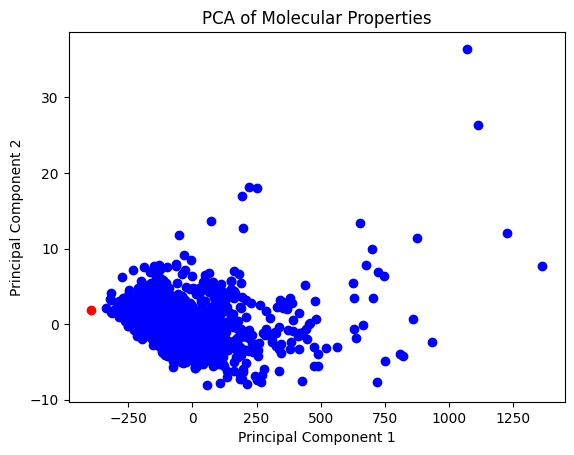

In [27]:
# @title Run PCA with FDA approved drugs
def calculate_properties(smiles):
  """Calculates molecular properties for a given SMILES string."""
  try:
    mol = Chem.MolFromSmiles(smiles)
    mw = Descriptors.MolWt(mol)
    fsp3 = Descriptors.FractionCSP3(mol)
    logp = Crippen.MolLogP(mol)
    hbd = Descriptors.NumHDonors(mol)
    hba = Descriptors.NumHAcceptors(mol)
    return mw, fsp3, logp, hbd, hba
  except:
    print(smiles)
    return None

def main():
  # Load SMILES data

  smiles_data = pd.read_csv('smiles.csv', header=None, names=['smiles'])

  # Calculate molecular properties
  properties = []
  for smiles in smiles_data['smiles']:
    props = calculate_properties(smiles)
    if props:
      properties.append(props)

  properties.append(calculate_properties(my_smiles))
  nrow = len(properties)
  properties = pd.DataFrame(properties, columns=['MW', 'Fsp3', 'LogP', 'HBD', 'HBA'])

  # Perform PCA
  pca = PCA(n_components=2)  # Adjust n_components as needed
  principal_components = pca.fit_transform(properties)

  # Create a DataFrame of principal components
  principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

  # Plotting
  plt.scatter(principal_df['PC1'][:nrow-1], principal_df['PC2'][:nrow-1], color='blue')
  plt.scatter(principal_df['PC1'][nrow-1], principal_df['PC2'][nrow-1], color='red',
              label='My molecule')
  plt.xlabel('Principal Component 1')
  plt.ylabel('Principal Component 2')
  plt.title('PCA of Molecular Properties')
  plt.show()

if __name__ == '__main__':
  main()